# Data Gathering 

Reference
https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e

In [1]:
# !pip install pandas-datareader

In [2]:
# !pip install yfinance
# !pip install matplotlib
# !pip install seaborn

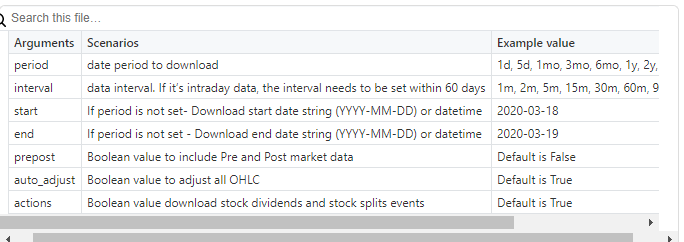

In [3]:
from IPython.display import Image
Image(filename='2021-03-05_17h03_49.png') 

- Thai SETI  www.investing.com
- Vietnam VNI www.investing.com

Asean
- Singapore ^STI
- Malaysia ^KLSE
- Indonesia ^JKSE
- Philippines PSEI.PS

Asia
- Hong Kong ^HSI
- China 399001.SZ
- South Korea ^KS11
- Japan ^N225
- Australia ^AORD
- New Zealand ^NZ50
- Taiwan ^TWII
- BSE SENSEX India ^BSESN
- India ^NSEI

Western
- USA ^DJI
- USA NY ^NYA
- USA AMEX ^XAX
- USA Chicago ^RUT
- USA Toronto ^GSPTSE
- GB ^FTSE
- German  ^GDAXI
- Paris ^FCHI
- Zurich ^STOXX50E
- Brussels ^BFX
- Russia IMOEX.ME
- Sao Paolo(Brazilian) ^BVSP
- Mexico ^MXX
- Santiago(Chile) ^IPSA
- Buenos Aires(Argentina) ^MERV
- Tel Aviv(Israel) ^TA125.TA
- Egyptian ^CASE30
- Johannesburg(South Africa)  ^JN0U.JO

-Other
- Gold GC=F
- Crude Oil CL=F
- Bitcoin USD BTC-USD

## Get stock value one by one

In [4]:
import yfinance as yf
tricker = "^DJI"
stockData = yf.Ticker(tricker)

# get stock info
print(stockData.info)

start ="2010-01-01"
end ="2020-12-31"
# get historical market data
hist = stockData.history(start=start, end=end)
hist.head()

# hist.info()

{'previousClose': 34133, 'regularMarketOpen': 34163.99, 'twoHundredDayAverage': 31087.04, 'trailingAnnualDividendYield': None, 'payoutRatio': None, 'volume24Hr': None, 'regularMarketDayHigh': 34331.2, 'navPrice': None, 'averageDailyVolume10Day': 329787500, 'totalAssets': None, 'regularMarketPreviousClose': 34133, 'fiftyDayAverage': 33523.94, 'trailingAnnualDividendRate': None, 'open': 34163.99, 'toCurrency': None, 'averageVolume10days': 329787500, 'expireDate': None, 'yield': None, 'algorithm': None, 'dividendRate': None, 'exDividendDate': None, 'beta': None, 'circulatingSupply': None, 'startDate': None, 'regularMarketDayLow': 34039.66, 'priceHint': 2, 'currency': 'USD', 'regularMarketVolume': 255811646, 'lastMarket': None, 'maxSupply': None, 'openInterest': None, 'marketCap': None, 'volumeAllCurrencies': None, 'strikePrice': None, 'averageVolume': 198905629, 'priceToSalesTrailing12Months': None, 'dayLow': 34039.66, 'ask': 34307.39, 'ytdReturn': None, 'askSize': 0, 'volume': 255811646,

Open          High           Low         Close   Volume  \
Date                                                                          
2009-12-31  10548.509766  10555.009766  10423.129883  10428.049805  1379400   
2010-01-04  10430.690430  10604.969727  10430.690430  10583.959961  1797800   
2010-01-05  10584.559570  10584.559570  10522.519531  10572.019531  1885400   
2010-01-06  10564.719727  10594.990234  10546.549805  10573.679688  1860400   
2010-01-07  10571.110352  10612.370117  10505.209961  10606.860352  2173900   

            Dividends  Stock Splits  
Date                                 
2009-12-31          0             0  
2010-01-04          0             0  
2010-01-05          0             0  
2010-01-06          0             0  
2010-01-07          0             0

In [5]:
# Save data 
data_df = yf.download(tricker, start=start, end=end)
data_df.to_csv(tricker+'.csv')

[*********************100%***********************]  1 of 1 completed


## Get all stock price in Dataframe

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3531 entries, 2009-12-24 to 2020-12-31
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SET                              2684 non-null   float64
 1   VNI                              2745 non-null   float64
 2   STI Index                        2744 non-null   float64
 3   FTSE Bursa Malaysia KLCI         2699 non-null   float64
 4   Composite Index                  2683 non-null   float64
 5   PSEi INDEX                       2676 non-null   float64
 6   HANG SENG INDEX                  2707 non-null   float64
 7   Shenzhen Component               2674 non-null   float64
 8   KOSPI Composite Index            2710 non-null   float64
 9   Nikkei 225                       2696 non-null   float64
 10  ALL ORDINARIES                   2780 non-null   float64
 11  S&P/NZX 50 INDEX GROSS ( GROSS   2686 non-null   float64
 12  TS

<AxesSubplot:xlabel='Date'>

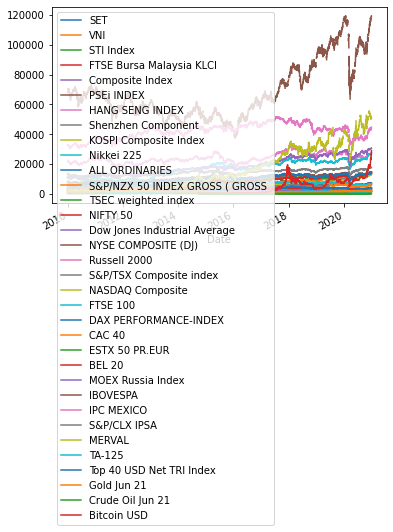

In [6]:
import yfinance as yf
import pandas as pd

df_trickers = pd.read_csv("StockIndexTrickers.csv")
# print(df_trickers.head())
# df_trickers.info()

start ="2009-12-25"
# start ="2010-01-01"
end ="2020-12-31"

stockDataList = []

trickers = df_trickers[df_trickers["FromYahoo"]==1][["Trickers","Stock Index"]]
# trickers
                                  
for index, row in trickers.iterrows():
    stockData = yf.Ticker(row["Trickers"])
    histData = stockData.history(start=start, end=end)
    dataFrame = pd.DataFrame(histData["Close"])
    dataFrame.columns =[stockData.info['shortName']]
    stockDataList.append(dataFrame)
    
stockThai = pd.read_csv("SET Index Historical Data.csv")
stockThai['Date'] = pd.to_datetime(stockThai['Date'])
stockThai = stockThai.set_index('Date')
df_stockThai = pd.DataFrame(stockThai['Close'].str.replace(',','').astype(float))
df_stockThai.columns =['SET']

stockVietnam = pd.read_csv("VN Historical Data.csv")
stockVietnam['Date'] = pd.to_datetime(stockVietnam['Date'])
stockVietnam = stockVietnam.set_index('Date')
df_stockVietnam = pd.DataFrame(stockVietnam['Close'].str.replace(',','').astype(float))
df_stockVietnam.columns =["VNI"]

df_allStocks = pd.merge(df_stockThai, df_stockVietnam, how= "outer",left_index=True, right_index=True)

for i in range(len(stockDataList)):
    df_allStocks = pd.merge(df_allStocks, stockDataList[i], how= "outer",left_index=True, right_index=True)
    
df_allStocks.info()
df_allStocks.plot()

## Handle null value

In [7]:
# print(df_allStocks.isnull().sum())

In [8]:
df_allStocks = df_allStocks.ffill()

In [9]:
# df_allStocks.isnull().sum()

In [10]:
start2 ="2010-01-01"
end2 ="2020-12-31"
df_allStocks = df_allStocks.loc[start2:end2]

df_allStocks.head()

SET     VNI    STI Index  FTSE Bursa Malaysia KLCI  \
Date                                                                
2010-01-04  732.28  517.05  2894.550049               1275.750000   
2010-01-05  732.11  532.53  2920.280029               1288.239990   
2010-01-06  735.73  534.46  2930.489990               1293.170044   
2010-01-07  734.63  533.34  2913.250000               1291.420044   
2010-01-08  738.96  520.90  2922.760010               1292.979980   

            Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
Date                                                                            
2010-01-04      2575.312988  3004.237549     21823.279297        13533.387695   
2010-01-05      2605.175537  3027.681396     22279.580078        13517.228516   
2010-01-06      2603.195557  3039.148438     22416.669922        13505.028320   
2010-01-07      2586.794189  3076.988770     22269.449219        13235.332031   
2010-01-08      2614.268311  3076.388916     22296.750000        13267.291992   

            KOSPI Composite Index    Nikkei 225  ...  MOEX Russia Index  \
Date                                             ...                      
2010-01-04            1696.140015  10654.790039  ...                NaN   
2010-01-05            1690.619995  10681.830078  ...                NaN   
2010-01-06            1705.319946  10731.450195  ...                NaN   
2010-01-07            1683.449951  10681.660156  ...                NaN   
2010-01-08            1695.260010  10798.320312  ...                NaN   

            IBOVESPA    IPC MEXICO  S&P/CLX IPSA       MERVAL       TA-125  \
Date                                                                         
2010-01-04   70045.0  32758.529297   3620.699951  2384.489990  1089.339966   
2010-01-05   70240.0  32732.759766   3624.100098  2401.750000  1098.199951   
2010-01-06   70729.0  32830.160156   3639.959961  2362.459961  1098.310059   
2010-01-07   70451.0  33064.570312   3681.060059  2389.449951  1094.040039   
2010-01-08   70263.0  32892.039062   3726.500000  2352.760010  1094.040039   

            Top 40 USD Net TRI Index  Gold Jun 21  Crude Oil Jun 21  \
Date                                                                  
2010-01-04                       NaN  1117.699951         81.510002   
2010-01-05                       NaN  1118.099976         81.769997   
2010-01-06                       NaN  1135.900024         83.180000   
2010-01-07                       NaN  1133.099976         82.660004   
2010-01-08                       NaN  1138.199951         82.750000   

            Bitcoin USD  
Date                     
2010-01-04          NaN  
2010-01-05          NaN  
2010-01-06          NaN  
2010-01-07          NaN  
2010-01-08          NaN  

[5 rows x 34 columns]

## Save raw data to csv

In [11]:
# Save data 
df_allStocks.to_csv('StocksData.csv')

# Building Model

## Get data from CSV

In [12]:
#Get data from CSV
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('StocksData.csv')
#Convert column date to index
dti = pd.to_datetime(df['Date'])
df.index = dti
df.drop(['Date'],axis = 1,inplace = True)
df_stock = df.iloc[:,0:29]
df_stock.drop(columns = ['MOEX Russia Index'],inplace = True)
df_stock_asia = df.iloc[:,0:14]
df_stock_asean = df.iloc[:,0:7]
df_stock_europe = df.loc[:,['SET','FTSE 100','DAX PERFORMANCE-INDEX','CAC 40','ESTX 50 PR.EUR','BEL 20','MOEX Russia Index','TA-125']]
df_stock_NA = df.loc[:,['SET','Dow Jones Industrial Average','NYSE COMPOSITE (DJ)','Russell 2000','S&P/TSX Composite index','NASDAQ Composite','IPC MEXICO']]
df_commodity = df.loc[:,['SET','Gold Jun 21','Crude Oil Jun 21','Bitcoin USD']]

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
df_stock.describe()

SET          VNI    STI Index  FTSE Bursa Malaysia KLCI  \
count  3525.000000  3525.000000  3525.000000               3525.000000   
mean   1412.059186   685.602247  3082.032875               1654.265137   
std     255.605990   213.776846   257.393960                140.636756   
min     685.890000   336.730000  2233.479980               1219.719971   
25%    1282.680000   505.120000  2880.760010               1575.010010   
50%    1479.070000   611.550000  3136.260010               1665.709961   
75%    1590.130000   908.180000  3267.479980               1766.829956   
max    1838.960000  1204.330000  3615.280029               1895.180054   

       Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
count      3525.000000  3525.000000      3525.000000         3525.000000   
mean       5002.882500  6614.645471     24198.567828        10382.395802   
std         963.989215  1439.266634      3154.574919         1811.059396   
min        2475.475586  2796.890869     16250.269531         6998.111816   
25%        4357.973633  5841.377930     21926.880859         9167.650391   
50%        5068.430664  7101.723633     23678.410156        10313.454102   
75%        5832.311035  7750.117188     26521.849609        11324.632812   
max        6689.287109  9056.291016     33154.121094        18098.068359   

       KOSPI Composite Index    Nikkei 225  ALL ORDINARIES  \
count            3525.000000   3525.000000     3525.000000   
mean             2071.614778  17145.704310     5511.229104   
std               210.597514   5000.478310      728.352758   
min              1457.640015   8160.009766     3927.600098   
25%              1947.670044  13485.139648     4981.899902   
50%              2028.989990  18264.789062     5498.500000   
75%              2170.250000  21382.619141     6030.299805   
max              2873.469971  27568.150391     7255.200195   

       S&P/NZX 50 INDEX GROSS ( GROSS   TSEC weighted index      NIFTY 50  \
count                      3525.000000          3525.000000   3525.000000   
mean                       6782.383392          9438.908977   8390.339593   
std                        2744.411453          1497.979691   2327.060126   
min                        2933.820068          6633.299316   4544.200195   
25%                        4473.379883          8280.219727   5987.700195   
50%                        6418.129883          9206.528320   8342.150391   
75%                        8806.040039         10558.290039  10526.750000   
max                       13246.769531         14687.700195  13981.950195   

       Dow Jones Industrial Average  NYSE COMPOSITE (DJ)  Russell 2000  \
count                   3525.000000          3525.000000   3525.000000   
mean                   19180.741413         10648.968089   1212.792838   
std                     5595.237493          1969.718679    318.965648   
min                     9686.480469          6434.810059    586.489990   
25%                    14897.549805          9187.790039    968.159973   
50%                    17946.679688         10835.900391   1210.140015   
75%                    24713.980469         12402.740234   1500.699951   
max                    30409.560547         14516.730469   2007.099976   

       S&P/TSX Composite index  NASDAQ Composite     FTSE 100  \
count              3525.000000       3525.000000  3525.000000   
mean              14430.181933       5538.496569  6563.681216   
std                1631.540464       2424.766373   703.135040   
min               11092.500000       2091.790039  4805.799805   
25%               12925.099609       3409.169922  5963.600098   
50%               14673.500000       5032.750000  6627.200195   
75%               15668.900391       7354.339844  7198.700195   
max               17944.099609      12899.419922  7877.500000   

       DAX PERFORMANCE-INDEX       CAC 40  ESTX 50 PR.EUR       BEL 20  \
count            3525.000000  3525.000000     3525.000000  3525.000000   
mean     

## Correlation Table

In [14]:
#Correlation Table
pd.set_option("display.max_rows", 999)
pd.set_option("display.max_columns", 999)
df_stock.corr()

SET       VNI  STI Index  \
SET                              1.000000  0.678796   0.579589   
VNI                              0.678796  1.000000   0.223251   
STI Index                        0.579589  0.223251   1.000000   
FTSE Bursa Malaysia KLCI         0.765398  0.224973   0.656062   
Composite Index                  0.930763  0.833706   0.454890   
PSEi INDEX                       0.949605  0.648957   0.480873   
HANG SENG INDEX                  0.726527  0.833698   0.617234   
Shenzhen Component              -0.250413  0.004059  -0.146534   
KOSPI Composite Index            0.638743  0.713958   0.368558   
Nikkei 225                       0.745891  0.883332   0.197921   
ALL ORDINARIES                   0.721104  0.889763   0.308117   
S&P/NZX 50 INDEX GROSS ( GROSS   0.590416  0.896249  -0.047354   
TSEC weighted index              0.540782  0.867493   0.115254   
NIFTY 50                         0.713253  0.934390   0.184893   
Dow Jones Industrial Average     0.713417  0.941056   0.133971   
NYSE COMPOSITE (DJ)              0.817057  0.900827   0.293905   
Russell 2000                     0.805186  0.912509   0.265511   
S&P/TSX Composite index          0.729641  0.855117   0.321612   
NASDAQ Composite                 0.556123  0.877600  -0.056897   
FTSE 100                         0.892773  0.701510   0.656492   
DAX PERFORMANCE-INDEX            0.800119  0.847282   0.275406   
CAC 40                           0.740437  0.867912   0.379780   
ESTX 50 PR.EUR                   0.682668  0.711517   0.474677   
BEL 20                           0.778284  0.767725   0.379602   
IBOVESPA                         0.282710  0.783535   0.025887   
IPC MEXICO                       0.851603  0.471611   0.512240   
S&P/CLX IPSA                     0.425375  0.769528   0.237185   
MERVAL                           0.547686  0.916633  -0.027157   

                                 FTSE Bursa Malaysia KLCI  Composite Index  \
SET                                              0.765398         0.930763   
VNI                                              0.224973         0.833706   
STI Index                                        0.656062         0.454890   
FTSE Bursa Malaysia KLCI                         1.000000         0.586250   
Composite Index                                  0.586250         1.000000   
PSEi INDEX                                       0.725268         0.914346   
HANG SENG INDEX                                  0.423393         0.801098   
Shenzhen Component                              -0.314384        -0.156089   
KOSPI Composite Index                            0.468035         0.710760   
Nikkei 225                                       0.371315         0.842663   
ALL ORDINARIES                                   0.325498         0.847835   
S&P/NZX 50 INDEX GROSS ( GROSS                   0.103580         0.775770   
TSEC weighted index                              0.170389         0.722529   
NIFTY 50                                         0.268056         0.872027   
Dow Jones Industrial Average                     0.261689         0.867009   
NYSE COMPOSITE (DJ)                              0.457218         0.913948   
Russell 2000                                     0.439266         0.905004   
S&P/TSX Composite index                          0.378815         0.850075   
NASDAQ Composite                                 0.123902         0.735472   
FTSE 100                                         0.674271         0.877640   
DAX PERFORMANCE-INDEX                            0.465143         0.879475   
CAC 40                                           0.384695         0.840658   
ESTX 50 PR.EUR                                   0.464367         0.732122   
BEL 20                                           0.499999         0.824820   
IBOVESPA                                        -0.202773         0.533796   
IPC MEXICO                                       0.756678         0.753593   
S&P/CLX IPSA     

## Time Series Analysis 

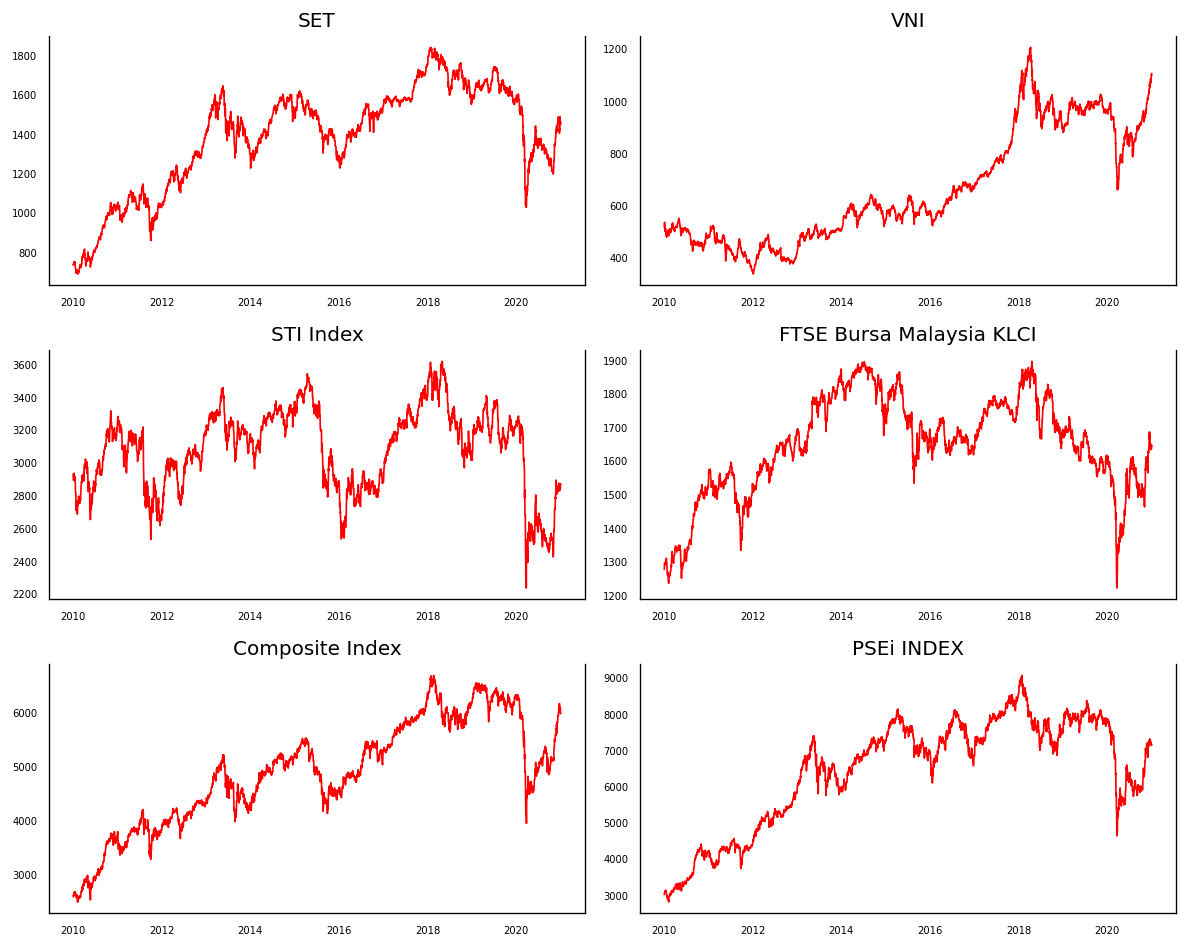

In [15]:
#Time Series Analysis
# Plot
import matplotlib.pyplot as plt 
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
 data = df_stock[df_stock.columns[i]]
 ax.plot(data, color='red', linewidth=1)
 ax.set_title(df_stock.columns[i])
 ax.xaxis.set_ticks_position('none')
 ax.yaxis.set_ticks_position('none')
 ax.spines['top'].set_alpha(0)
 ax.tick_params(labelsize=6)
plt.tight_layout();

## Normal Test 

In [16]:
#Normal Test
from scipy import stats 
for i in df_stock:
    print(df_stock[i])
    stat,p = stats.normaltest(df_stock[i])
    print("Statistics = %.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p> alpha:
        print('Data looks Gaussian (fail to reject null hypothesis)')
    else:
        print('Data looks non-Gaussian (reject null hypothesis)')
    

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2020-12-27    1486.31
2020-12-28    1452.67
2020-12-29    1461.95
2020-12-30    1449.35
2020-12-31    1449.35
Name: SET, Length: 3525, dtype: float64
Statistics = 327.845, p=0.000
Data looks non-Gaussian (reject null hypothesis)
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2020-12-27    1084.42
2020-12-28    1091.33
2020-12-29    1099.49
2020-12-30    1097.54
2020-12-31    1103.87
Name: VNI, Length: 3525, dtype: float64
Statistics = 1971.708, p=0.000
Data looks non-Gaussian (reject null hypothesis)
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2020-12-27    2833.399902
2020-12-28    2840.139893
2020-12-29    2848.139893
2020-12-30    2869.219971
20

## Auto-correlation (ACF)

In [17]:
# !pip install statsmodels

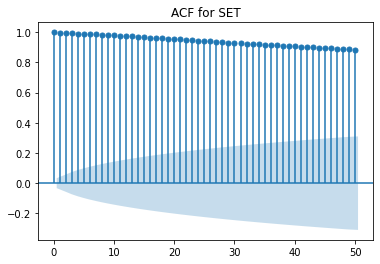

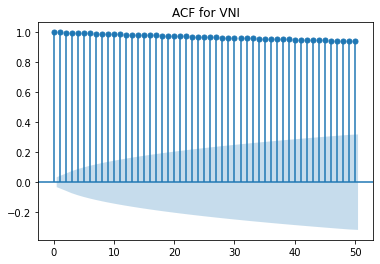

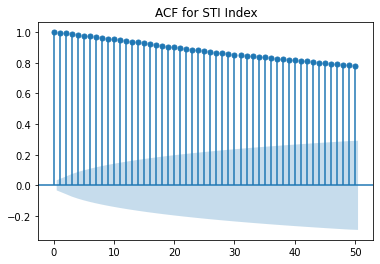

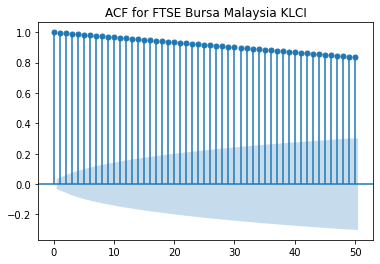

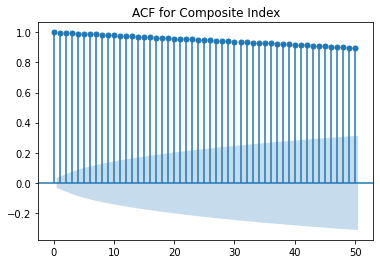

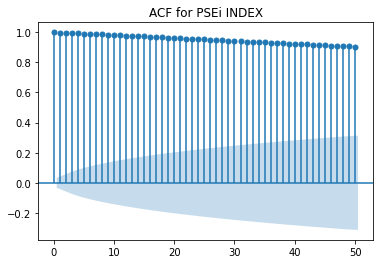

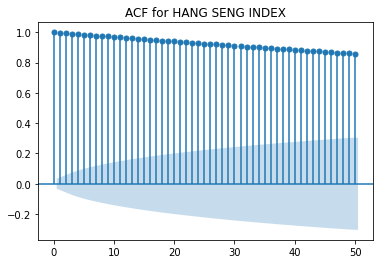

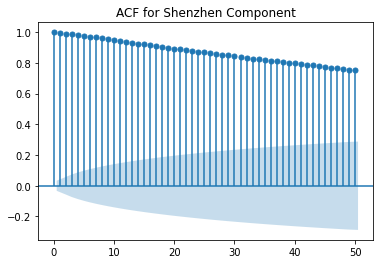

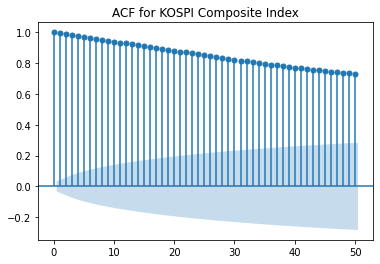

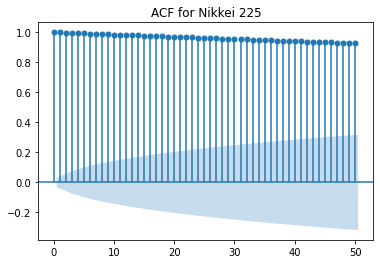

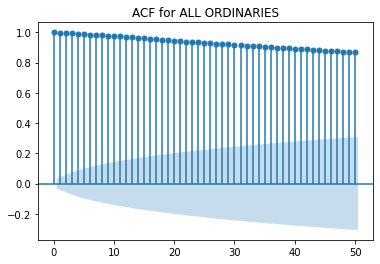

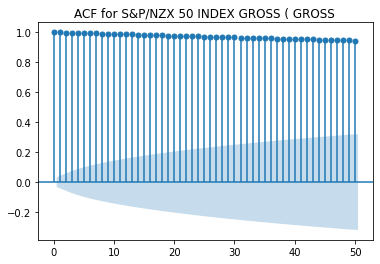

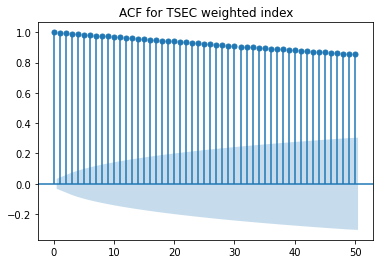

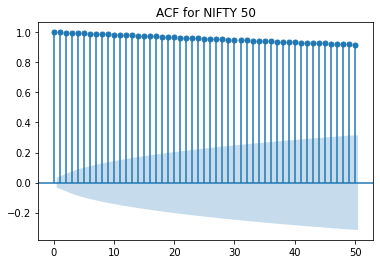

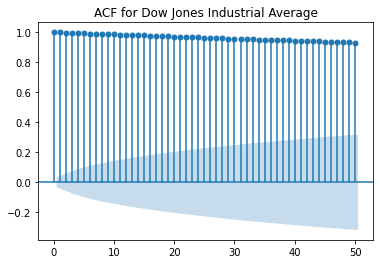

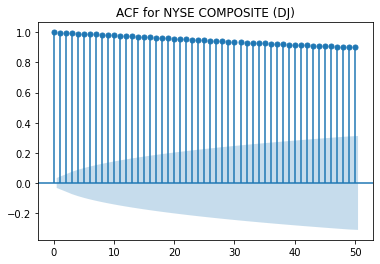

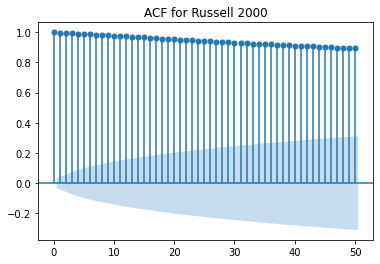

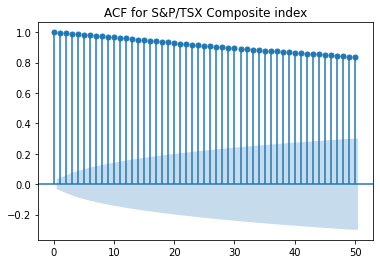

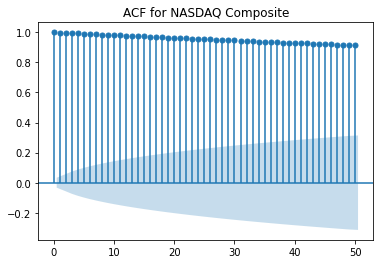

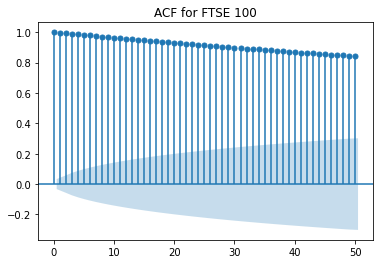

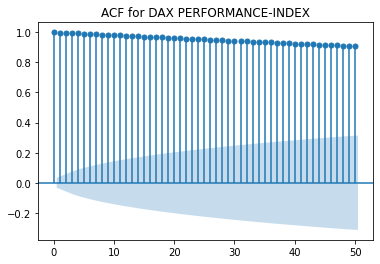

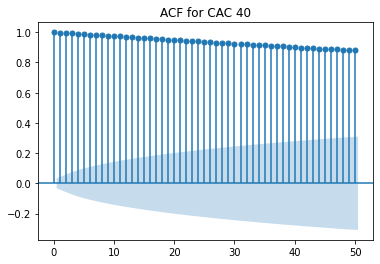

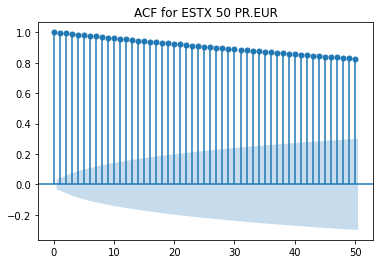

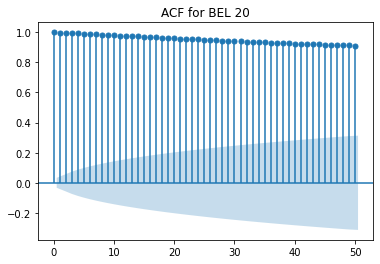

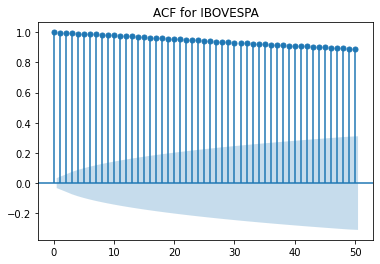

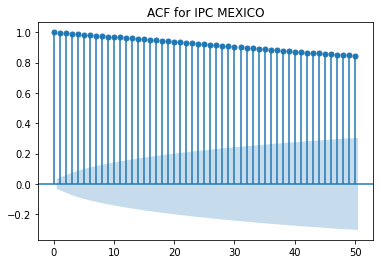

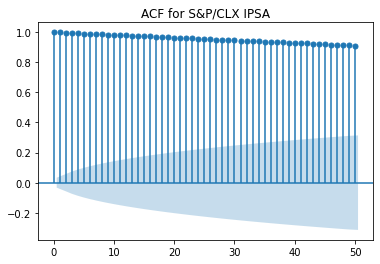

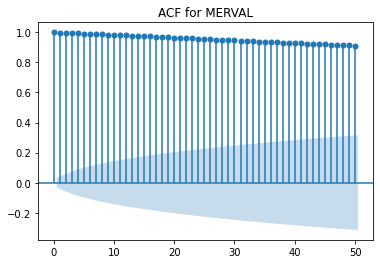

In [18]:
#Auto-correlation (ACF)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
for i in df_stock:
 sm.graphics.tsa.plot_acf(df_stock[i],lags = 50)
 plt.title('ACF for %s' %i)
 plt.show()

## Partial Auto-correlation (PACF)

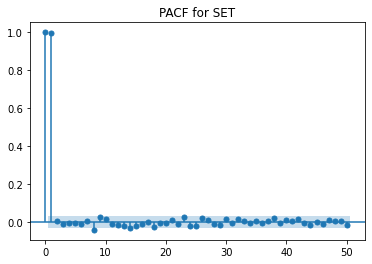

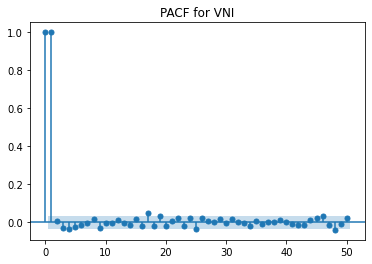

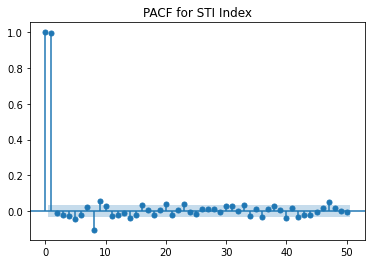

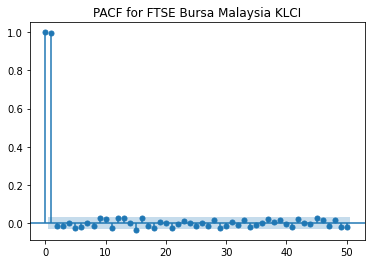

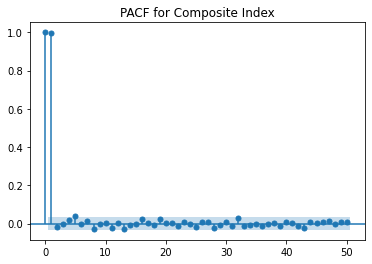

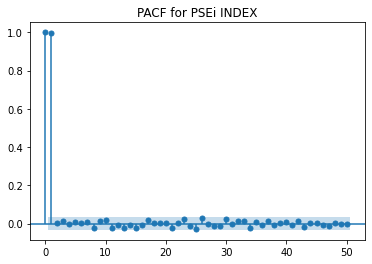

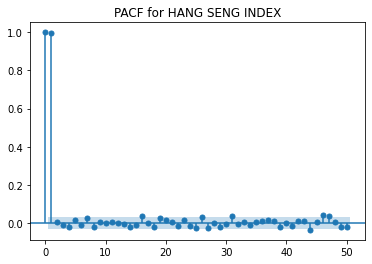

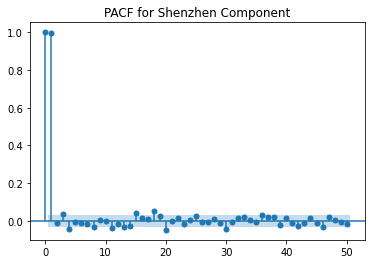

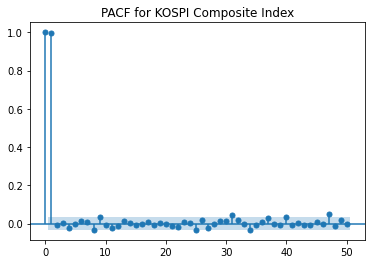

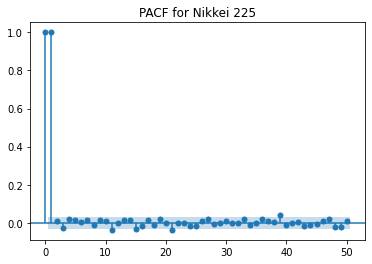

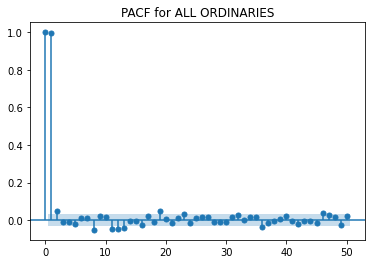

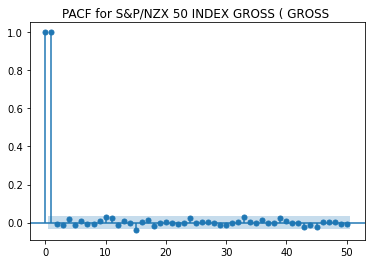

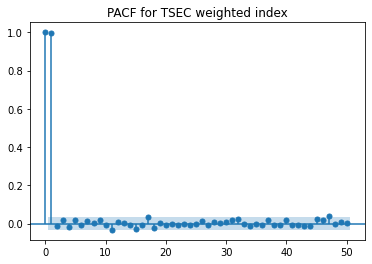

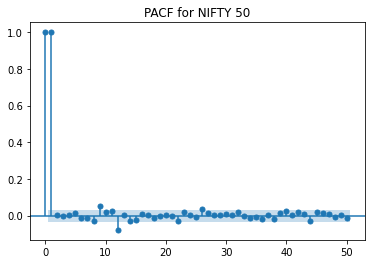

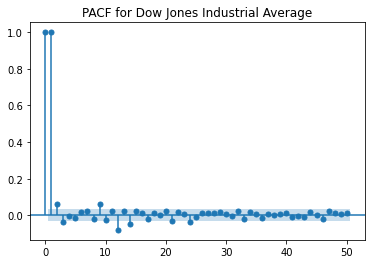

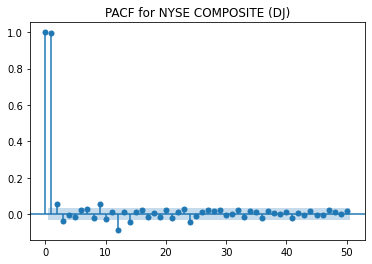

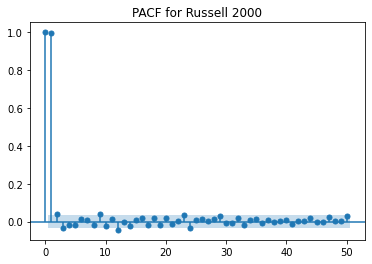

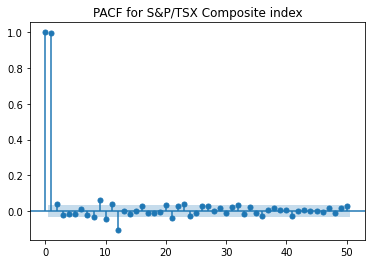

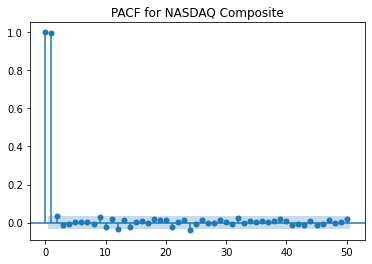

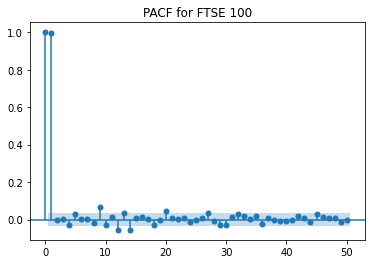

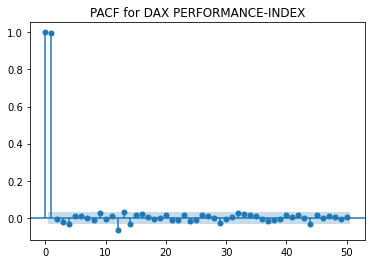

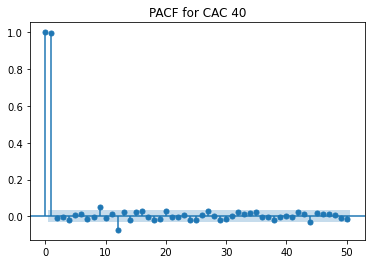

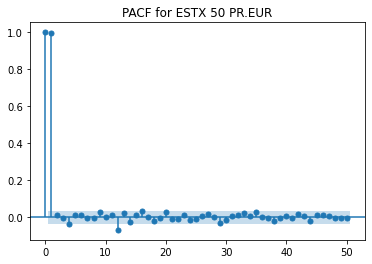

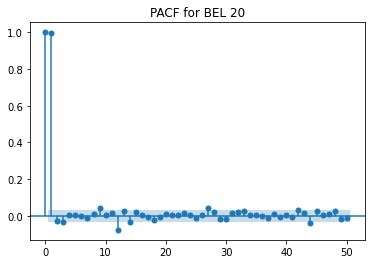

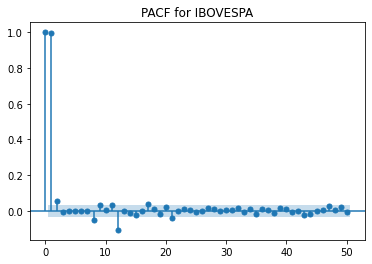

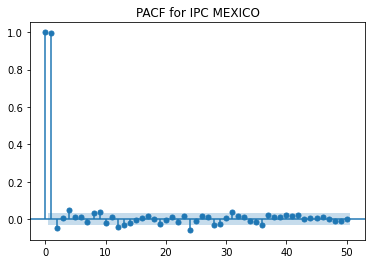

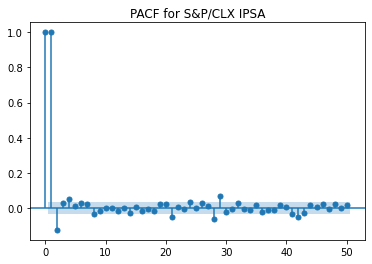

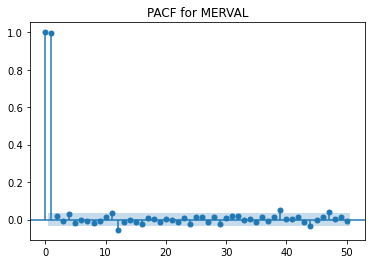

In [19]:
#Partial Auto-correlation (PACF)
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
for i in df_stock:
 sm.graphics.tsa.plot_pacf(df_stock[i],lags = 50)
 plt.title('PACF for %s' %i)
 plt.show()

## Stationary Check - Augmentated Dickey Fuller Test

In [20]:
#Stationary Check
#Augmentated Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
def augmented_dickey_fuller_statistics(time_series):
    result = adfuller(time_series.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [21]:
#Split Training Data(70%)/Validation Data(30%)
n_obs = 2467 #For traning data 
X_train = df_stock[0:n_obs]
X_validation = df_stock[n_obs:]
print(X_train.shape,X_validation.shape)

(2467, 28) (1058, 28)


In [22]:
for i in df_stock:
    print(df_stock[i])
    augmented_dickey_fuller_statistics(df_stock[i])

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2020-12-27    1486.31
2020-12-28    1452.67
2020-12-29    1461.95
2020-12-30    1449.35
2020-12-31    1449.35
Name: SET, Length: 3525, dtype: float64
ADF Statistic: -2.636441
p-value: 0.085697
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2020-12-27    1084.42
2020-12-28    1091.33
2020-12-29    1099.49
2020-12-30    1097.54
2020-12-31    1103.87
Name: VNI, Length: 3525, dtype: float64
ADF Statistic: -0.400646
p-value: 0.909991
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2020-12-27    2833.399902
2020-12-28    2840.139893
2020-12-29    2848.

In [23]:
for i in X_train:
    print(X_train[i])
    augmented_dickey_fuller_statistics(X_train[i])

Date
2010-01-04     732.28
2010-01-05     732.11
2010-01-06     735.73
2010-01-07     734.63
2010-01-08     738.96
               ...   
2018-02-03    1827.35
2018-02-04    1827.35
2018-02-05    1810.32
2018-02-06    1788.43
2018-02-07    1785.44
Name: SET, Length: 2467, dtype: float64
ADF Statistic: -1.742075
p-value: 0.409575
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04     517.05
2010-01-05     532.53
2010-01-06     534.46
2010-01-07     533.34
2010-01-08     520.90
               ...   
2018-02-03    1105.04
2018-02-04    1105.04
2018-02-05    1048.71
2018-02-06    1011.60
2018-02-07    1040.55
Name: VNI, Length: 2467, dtype: float64
ADF Statistic: 1.502880
p-value: 0.997535
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-04    2894.550049
2010-01-05    2920.280029
2010-01-06    2930.489990
2010-01-07    2913.250000
2010-01-08    2922.760010
                 ...     
2018-02-03    3529.820068
2018-02-04    3529.820068
2018-02-05    3482.9

<AxesSubplot:xlabel='Date'>

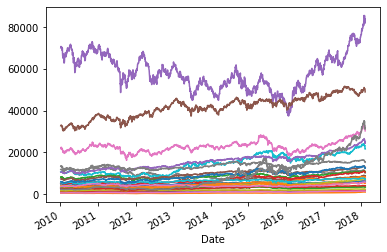

In [24]:
X_train.plot(legend = False)

<AxesSubplot:xlabel='Date'>

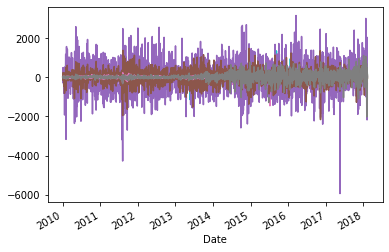

In [25]:
#Transformation
X_transform_data = X_train.diff().dropna()
X_transform_data.head()
X_transform_data.describe()
X_transform_data.plot(legend = False)

In [26]:
for i in X_transform_data:
    print(X_transform_data[i])
    augmented_dickey_fuller_statistics(X_transform_data[i])

Date
2010-01-05    -0.17
2010-01-06     3.62
2010-01-07    -1.10
2010-01-08     4.33
2010-01-11     7.99
              ...  
2018-02-03     0.00
2018-02-04     0.00
2018-02-05   -17.03
2018-02-06   -21.89
2018-02-07    -2.99
Name: SET, Length: 2466, dtype: float64
ADF Statistic: -48.667511
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    15.48
2010-01-06     1.93
2010-01-07    -1.12
2010-01-08   -12.44
2010-01-11    -5.84
              ...  
2018-02-03     0.00
2018-02-04     0.00
2018-02-05   -56.33
2018-02-06   -37.11
2018-02-07    28.95
Name: VNI, Length: 2466, dtype: float64
ADF Statistic: -15.892471
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Date
2010-01-05    25.729980
2010-01-06    10.209961
2010-01-07   -17.239990
2010-01-08     9.510010
2010-01-11    10.770020
                ...    
2018-02-03     0.000000
2018-02-04     0.000000
2018-02-05   -46.890137
2018-02-06   -76.550049
2018-02-07   -22.609863
Name:

## Granger's Causality Test

In [27]:
#Granger's Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(X_transform_data, variables = X_transform_data.columns)  

SET_x   VNI_x  STI Index_x  \
SET_y                              1.0000  0.0672       0.0430   
VNI_y                              0.0150  1.0000       0.0000   
STI Index_y                        0.0083  0.7242       1.0000   
FTSE Bursa Malaysia KLCI_y         0.0000  0.3190       0.0000   
Composite Index_y                  0.0034  0.0686       0.0557   
PSEi INDEX_y                       0.0000  0.1911       0.0000   
HANG SENG INDEX_y                  0.0005  0.0048       0.0000   
Shenzhen Component_y               0.3770  0.0845       0.0451   
KOSPI Composite Index_y            0.0000  0.0245       0.0000   
Nikkei 225_y                       0.0000  0.0024       0.0000   
ALL ORDINARIES_y                   0.0000  0.1972       0.0000   
S&P/NZX 50 INDEX GROSS ( GROSS _y  0.0001  0.0463       0.0000   
TSEC weighted index_y              0.0000  0.0364       0.0000   
NIFTY 50_y                         0.0438  0.0283       0.0718   
Dow Jones Industrial Average_y     0.7099  0.3629       0.0966   
NYSE COMPOSITE (DJ)_y              0.2718  0.4656       0.0222   
Russell 2000_y                     0.2754  0.2855       0.4902   
S&P/TSX Composite index_y          0.0298  0.4433       0.0038   
NASDAQ Composite_y                 0.8093  0.3432       0.1409   
FTSE 100_y                         0.0225  0.6346       0.0136   
DAX PERFORMANCE-INDEX_y            0.2974  0.4331       0.1603   
CAC 40_y                           0.0644  0.5486       0.0700   
ESTX 50 PR.EUR_y                   0.1414  0.4360       0.1525   
BEL 20_y                           0.0155  0.5231       0.0249   
IBOVESPA_y                         0.0434  0.2171       0.2019   
IPC MEXICO_y                       0.4831  0.1619       0.0805   
S&P/CLX IPSA_y                     0.5098  0.1061       0.0470   
MERVAL_y                           0.3500  0.3700       0.6097   

                                   FTSE Bursa Malaysia KLCI_x  \
SET_y                                                  0.2607   
VNI_y                                                  0.0058   
STI Index_y                                            0.0089   
FTSE Bursa Malaysia KLCI_y                             1.0000   
Composite Index_y                                      0.0845   
PSEi INDEX_y                                           0.0040   
HANG SENG INDEX_y                                      0.0089   
Shenzhen Component_y                                   0.0101   
KOSPI Composite Index_y                                0.0349   
Nikkei 225_y                                           0.0627   
ALL ORDINARIES_y                                       0.2493   
S&P/NZX 50 INDEX GROSS ( GROSS _y                      0.0308   
TSEC weighted index_y                                  0.1194   
NIFTY 50_y                                             0.0965   
Dow Jones Industrial Average_y                         0.1356   
NYSE COMPOSITE (DJ)_y                                  0.2359   
Russell 2000_y                                         0.2275   
S&P/TSX Composite index_y                              0.1030   
NASDAQ Composite_y                                     0.6317   
FTSE 100_y                                             0.0630   
DAX PERFORMANCE-INDEX_y                                0.3208   
CAC 40_y                                               0.2432   
ESTX 50 PR.EUR_y                                       0.1627   
BEL 20_y                                               0.0776   
IBOVESPA_y                                             0.3376   
IPC MEXICO_y                                           0.3193   
S&P/CLX IPSA_y                                         0.1023   
MERVAL_y                                               0.4966   

                                   Composite Index_x  PSEi INDEX_x  \
SET_y                                         0.0000        0.1740   
VNI_y                                         0.0032        0.0077   
STI Index_y              

## VAR MODEL (Run All Markets)

In [28]:
#VAR MODEL (Run All Markets)
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

#Lag Order Selection
model_world = VAR(endog = X_transform_data)
res_world = model_world.select_order(30)
print(res_world.summary())

#Model
mod_world = VAR(X_transform_data)
res_world = mod_world.fit(maxlags=30, ic='aic')
print(res_world.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        198.7      198.8*   1.959e+86       198.7
1       198.0*       199.9  9.648e+85*      198.7*
2        198.2       202.0   1.188e+86       199.6
3        198.4       204.1   1.467e+86       200.5
4        198.7       206.2   1.957e+86       201.4
5        199.0       208.3   2.543e+86       202.4
6        199.2       210.5   3.244e+86       203.3
7        199.3       212.5   3.787e+86       204.1
8        199.6       214.6   4.812e+86       205.0
9        199.9       216.7   6.445e+86       206.0
10       200.1       218.9   8.608e+86       207.0
11       200.5       221.0   1.179e+87       207.9
12       200.7       223.1   1.493e+87       208.8
13       200.9       225.2   1.867e+87       209.7
14       201.1       227.3   2.342e+87       210.6
15       201.3       229.4   2.987e+87       211.5
16       201.6       231.5   3.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:23
--------------------------------------------------------------------
No. of Equations:         28.0000    BIC:                    199.889
Nobs:                     2465.00    HQIC:                   198.671
Log likelihood:          -341128.    FPE:                9.54334e+85
AIC:                      197.976    Det(Omega_mle):     6.87819e+85
--------------------------------------------------------------------
Results for equation SET
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.325153         0.216834            1.500           0.134
L1.SET                                    -0.026584         0.023599           -

## Durbin Watson 

In [29]:
#Durbin Watson
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(res_world.resid)

print('Durbin Watson Test')
for col,val in zip(X_transform_data.columns,out):
    print((col), ':', round(val,2))

Durbin Watson Test
SET : 2.06
VNI : 1.98
STI Index : 2.07
FTSE Bursa Malaysia KLCI : 2.04
Composite Index : 2.02
PSEi INDEX : 2.04
HANG SENG INDEX : 2.08
Shenzhen Component : 2.01
KOSPI Composite Index : 2.1
Nikkei 225 : 2.05
ALL ORDINARIES : 2.13
S&P/NZX 50 INDEX GROSS ( GROSS  : 2.0
TSEC weighted index : 2.07
NIFTY 50 : 2.04
Dow Jones Industrial Average : 2.0
NYSE COMPOSITE (DJ) : 2.0
Russell 2000 : 2.0
S&P/TSX Composite index : 2.01
NASDAQ Composite : 2.0
FTSE 100 : 2.05
DAX PERFORMANCE-INDEX : 2.02
CAC 40 : 2.02
ESTX 50 PR.EUR : 2.02
BEL 20 : 2.02
IBOVESPA : 2.0
IPC MEXICO : 2.0
S&P/CLX IPSA : 2.02
MERVAL : 1.99


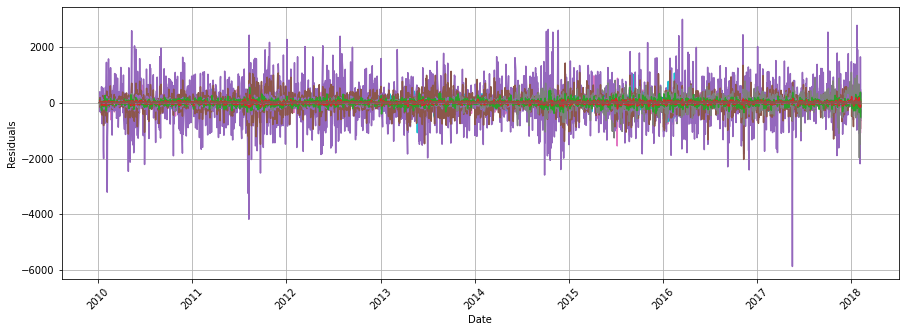

In [30]:
y_fitted = res_world.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_world.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [31]:
#ASEAN
X_transform_ASEAN = X_transform_data[['SET','VNI','STI Index','FTSE Bursa Malaysia KLCI','Composite Index','PSEi INDEX']]

#Lag Order Selection
model_ASEAN = VAR(endog = X_transform_ASEAN)
res_ASEAN = model_ASEAN.select_order(30)
print(res_ASEAN.summary())

mod_ASEAN = VAR(X_transform_ASEAN)
res_ASEAN = mod_ASEAN.fit(maxlags=30, ic='aic')
print(res_ASEAN.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        32.69      32.70*   1.568e+14       32.69
1        32.64       32.74   1.498e+14      32.68*
2        32.64       32.83   1.503e+14       32.71
3       32.63*       32.90  1.487e+14*       32.73
4        32.64       33.00   1.498e+14       32.77
5        32.65       33.09   1.513e+14       32.81
6        32.65       33.18   1.517e+14       32.85
7        32.66       33.28   1.535e+14       32.89
8        32.68       33.38   1.557e+14       32.93
9        32.69       33.48   1.580e+14       32.98
10       32.71       33.58   1.602e+14       33.02
11       32.72       33.68   1.624e+14       33.07
12       32.74       33.78   1.650e+14       33.12
13       32.74       33.87   1.663e+14       33.15
14       32.76       33.97   1.682e+14       33.20
15       32.76       34.06   1.697e+14       33.24
16       32.77       34.16   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:24
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    32.9084
Nobs:                     2463.00    HQIC:                   32.7372
Log likelihood:          -61050.6    FPE:                1.49674e+14
AIC:                      32.6395    Det(Omega_mle):     1.42930e+14
--------------------------------------------------------------------
Results for equation SET
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               0.393622         0.224475            1.754           0.080
L1.SET                             -0.009374         0.023998           -0.391           0.696
L1.VNI

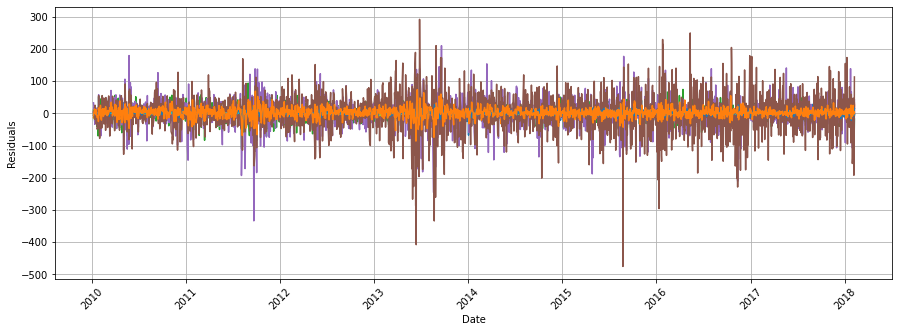

In [32]:
y_fitted = res_ASEAN.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_ASEAN.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [33]:
#ASIA
X_transform_ASIA = X_transform_data[['SET','HANG SENG INDEX','Shenzhen Component','KOSPI Composite Index'
                                     ,'Nikkei 225','TSEC weighted index','NIFTY 50','ALL ORDINARIES','S&P/NZX 50 INDEX GROSS ( GROSS ']]
#Lag Order Selection
model_ASIA = VAR(endog = X_transform_ASIA)
res_ASIA = model_ASIA.select_order(30)
print(res_ASIA.summary())

mod_ASIA = VAR(X_transform_ASIA)
res_ASIA = mod_ASIA.fit(maxlags=30, ic='aic')
print(res_ASIA.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        69.24      69.26*   1.176e+30      69.25*
1       69.18*       69.39  1.108e+30*       69.26
2        69.20       69.61   1.135e+30       69.35
3        69.24       69.84   1.180e+30       69.46
4        69.26       70.05   1.201e+30       69.55
5        69.29       70.28   1.240e+30       69.65
6        69.32       70.50   1.273e+30       69.75
7        69.33       70.70   1.282e+30       69.82
8        69.35       70.91   1.311e+30       69.92
9        69.39       71.14   1.362e+30       70.02
10       69.42       71.37   1.404e+30       70.13
11       69.45       71.59   1.451e+30       70.23
12       69.48       71.82   1.501e+30       70.33
13       69.51       72.04   1.538e+30       70.43
14       69.53       72.25   1.568e+30       70.52
15       69.56       72.47   1.624e+30       70.62
16       69.59       72.70   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:25
--------------------------------------------------------------------
No. of Equations:         9.00000    BIC:                    69.3972
Nobs:                     2465.00    HQIC:                   69.2621
Log likelihood:          -116660.    FPE:                1.11350e+30
AIC:                      69.1851    Det(Omega_mle):     1.07366e+30
--------------------------------------------------------------------
Results for equation SET
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                      0.405197         0.223560            1.812           0.070
L1.SET                                     0.007948         0.023164            

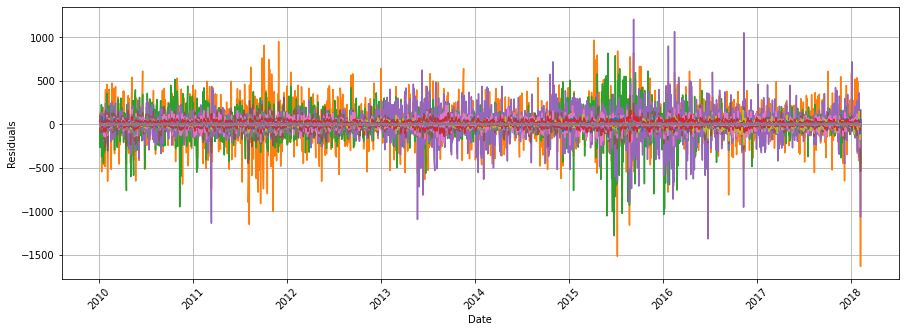

In [34]:
y_fitted = res_ASIA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_ASIA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [35]:
#Europe
X_transform_EU = X_transform_data[['SET','FTSE 100','DAX PERFORMANCE-INDEX','CAC 40','ESTX 50 PR.EUR','BEL 20']]
#Lag Order Selection
model_EU = VAR(endog = X_transform_EU)
res_EU = model_EU.select_order(30)
print(res_EU.summary())

mod_EU = VAR(X_transform_EU)
res_EU = mod_EU.fit(maxlags=30, ic='aic')
print(res_EU.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        35.28       35.29   2.099e+15       35.29
1       35.17*      35.27*  1.871e+15*      35.20*
2        35.18       35.36   1.896e+15       35.25
3        35.19       35.46   1.923e+15       35.29
4        35.20       35.56   1.941e+15       35.33
5        35.21       35.66   1.962e+15       35.37
6        35.21       35.74   1.966e+15       35.41
7        35.21       35.83   1.965e+15       35.44
8        35.23       35.93   1.992e+15       35.48
9        35.24       36.03   2.017e+15       35.53
10       35.26       36.13   2.049e+15       35.57
11       35.27       36.23   2.078e+15       35.62
12       35.28       36.33   2.106e+15       35.66
13       35.29       36.42   2.126e+15       35.70
14       35.30       36.52   2.150e+15       35.75
15       35.32       36.62   2.175e+15       35.79
16       35.33       36.72   2.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:26
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    35.2585
Nobs:                     2465.00    HQIC:                   35.1955
Log likelihood:          -64278.2    FPE:                1.86030e+15
AIC:                      35.1595    Det(Omega_mle):     1.82892e+15
--------------------------------------------------------------------
Results for equation SET
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            0.431923         0.222310            1.943           0.052
L1.SET                          -0.021603         0.021288           -1.015           0.310
L1.FTSE 100       

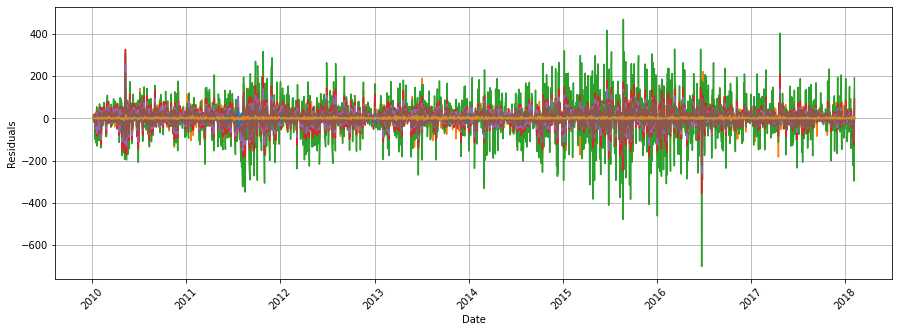

In [36]:
y_fitted = res_EU.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_EU.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [37]:
#North America
X_transform_NA = X_transform_data[['SET','Dow Jones Industrial Average','NYSE COMPOSITE (DJ)','Russell 2000'
                                   ,'S&P/TSX Composite index','NASDAQ Composite','IPC MEXICO']]
#Lag Order Selection
model_NA = VAR(endog = X_transform_NA)
res_NA = model_NA.select_order(30)
print(res_NA.summary())

mod_NA = VAR(X_transform_NA)
res_NA = mod_NA.fit(maxlags=30, ic='aic')
print(res_NA.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        48.33      48.35*   9.791e+20       48.34
1       48.25*       48.38  9.021e+20*      48.30*
2        48.27       48.52   9.151e+20       48.36
3        48.28       48.64   9.238e+20       48.41
4        48.30       48.78   9.452e+20       48.47
5        48.32       48.92   9.651e+20       48.54
6        48.34       49.06   9.884e+20       48.60
7        48.35       49.19   9.999e+20       48.66
8        48.37       49.32   1.012e+21       48.71
9        48.38       49.45   1.029e+21       48.77
10       48.40       49.58   1.047e+21       48.83
11       48.42       49.72   1.070e+21       48.89
12       48.44       49.85   1.087e+21       48.95
13       48.45       49.98   1.103e+21       49.01
14       48.47       50.12   1.128e+21       49.07
15       48.49       50.26   1.149e+21       49.13
16       48.52       50.40   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:27
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    48.3673
Nobs:                     2465.00    HQIC:                   48.2832
Log likelihood:          -83877.8    FPE:                8.87813e+20
AIC:                      48.2353    Det(Omega_mle):     8.67903e+20
--------------------------------------------------------------------
Results for equation SET
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
const                                   0.396355         0.218113            1.817           0.069
L1.SET                                 -0.044343         0.020469           -2.166       

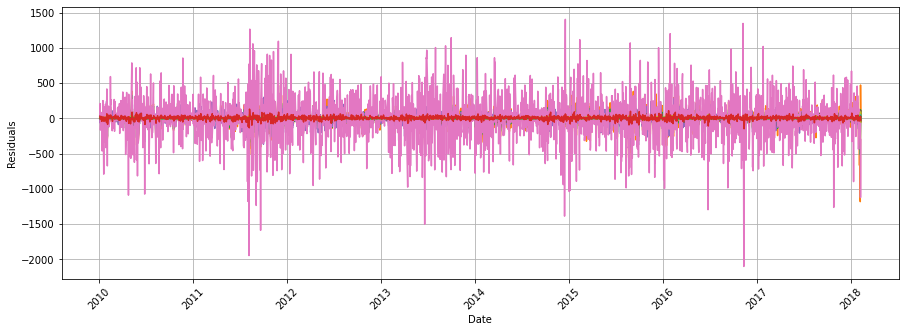

In [38]:
y_fitted = res_NA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_NA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [39]:
#South America
X_transform_SA = X_transform_data[['SET','IBOVESPA','S&P/CLX IPSA','MERVAL']]
#Lag Order Selection
model_SA = VAR(endog = X_transform_SA)
res_SA = model_SA.select_order(30)
print(res_SA.summary())

mod_SA = VAR(X_transform_SA)
res_SA = mod_SA.fit(maxlags=30, ic='aic')
print(res_SA.summary())


C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        34.99       35.00   1.564e+15       34.99
1        34.92      34.97*   1.464e+15      34.94*
2        34.92       35.00   1.461e+15       34.95
3       34.91*       35.03  1.446e+15*       34.95
4        34.92       35.08   1.457e+15       34.97
5        34.92       35.12   1.461e+15       34.99
6        34.92       35.16   1.467e+15       35.01
7        34.92       35.20   1.469e+15       35.02
8        34.93       35.24   1.473e+15       35.04
9        34.93       35.28   1.477e+15       35.06
10       34.93       35.32   1.482e+15       35.07
11       34.94       35.37   1.492e+15       35.09
12       34.95       35.42   1.508e+15       35.12
13       34.95       35.46   1.510e+15       35.13
14       34.96       35.50   1.519e+15       35.15
15       34.96       35.54   1.528e+15       35.17
16       34.97       35.59   1.

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:28
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    35.0186
Nobs:                     2463.00    HQIC:                   34.9405
Log likelihood:          -56901.7    FPE:                1.42925e+15
AIC:                      34.8959    Det(Omega_mle):     1.39947e+15
--------------------------------------------------------------------
Results for equation SET
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.358024         0.219477            1.631           0.103
L1.SET                 -0.053586         0.020848           -2.570           0.010
L1.IBOVESPA             0.002269         0.000353     

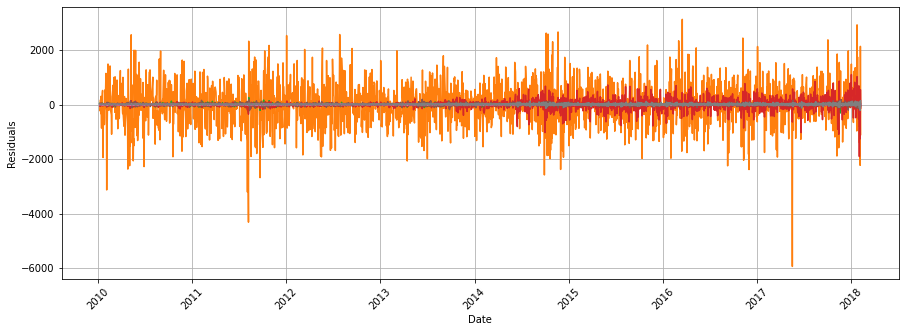

In [40]:
y_fitted = res_SA.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_SA.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

In [41]:
#Try only t-test <-2 and >2
X_transform_select = X_transform_data[['SET','STI Index','Composite Index','Shenzhen Component','Nikkei 225','NYSE COMPOSITE (DJ)','IBOVESPA','S&P/CLX IPSA']]
X_transform_select

#Lag Order Selection
model_select = VAR(endog = X_transform_select)
res_select = model_select.select_order(30)
res_select.summary()

#Model
mod_select = VAR(X_transform_select)
res_select = mod_select.fit(maxlags=30, ic='aic')
print(res_select.summary())

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:29
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    65.9228
Nobs:                     2464.00    HQIC:                   65.7187
Log likelihood:          -108656.    FPE:                3.09496e+28
AIC:                      65.6022    Det(Omega_mle):     2.92932e+28
--------------------------------------------------------------------
Results for equation SET
                            coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------
const                          0.321214         0.214232            1.499           0.134
L1.SET                        -0.042167         0.022882           -1.843           0.065
L1.STI Index              

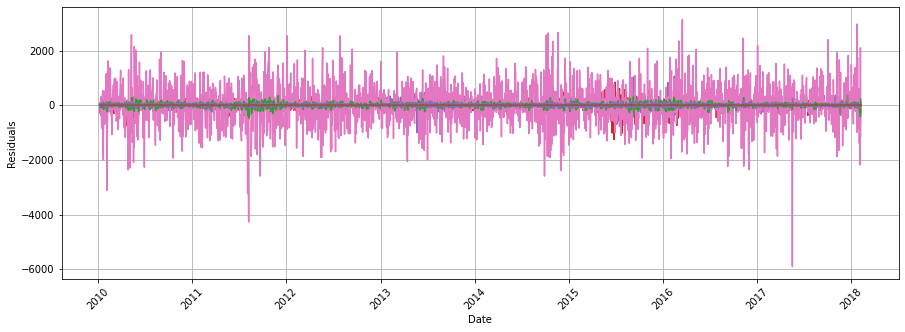

In [42]:
y_fitted = res_select.fittedvalues
plt.figure(figsize = (15,5))
plt.plot(res_select.resid, label='resid')
plt.plot(y_fitted, label='VAR prediction')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Residuals')
plt.grid(True)

(2467, 4) (1058, 4)
                     SET_x  Gold Jun 21_x  Crude Oil Jun 21_x  Bitcoin USD_x
SET_y               1.0000         0.1815              0.0233         0.4706
Gold Jun 21_y       0.0023         1.0000              0.3799         0.5222
Crude Oil Jun 21_y  0.0584         0.2683              1.0000         0.6864
Bitcoin USD_y       0.6437         0.5982              0.2986         1.0000
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.88      19.90*   4.319e+08      19.89*
1        19.88       19.96   4.293e+08       19.91
2        19.89       20.04   4.326e+08       19.94
3        19.90       20.12   4.408e+08       19.99
4        19.92       20.21   4.471e+08       20.03
5        19.90       20.25   4.387e+08       20.03
6        19.89       20.31   4.352e+08       20.05
7        19.90       20.39   4.393e+08       20.08
8        19.89       20.45   4.359

C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Anawat\Anaconda3\envs\P and R\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 06, May, 2021
Time:                     20:01:31
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    20.5629
Nobs:                     1229.00    HQIC:                   20.1373
Log likelihood:          -19028.1    FPE:                4.30572e+08
AIC:                      19.8805    Det(Omega_mle):     3.77606e+08
--------------------------------------------------------------------
Results for equation SET
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                        0.218628         0.260878            0.838           0.402
L1.SET                      -0.004925         0.029328           -0.168           0.867
L1.Gold Jun 21               0.021

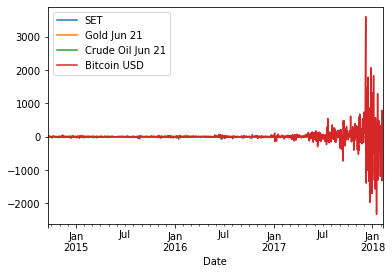

In [43]:
#Commodity
df_commodity = df.loc[:,['SET','Gold Jun 21','Crude Oil Jun 21','Bitcoin USD']]
#Split Training Data(70%)/Validation Data(30%)
n_obs = 2467 #For traning data 
X_train_com = df_commodity[0:n_obs]
X_validation_com = df_commodity[n_obs:]
print(X_train_com.shape,X_validation_com.shape)
      
#Transformation
X_transform_com_data = X_train_com.diff().dropna()
X_transform_com_data.head()
X_transform_com_data.describe()
X_transform_com_data.plot()

print(grangers_causality_matrix(X_transform_com_data, variables = X_transform_com_data.columns))

#Lag Order Selection
model_com = VAR(endog = X_transform_com_data)
res_com = model_com.select_order(30)
print(res_com.summary())

mod_com = VAR(X_transform_com_data)
res_com = mod_com.fit(maxlags=30, ic='aic')
print(res_com.summary())

In [44]:
#Prediction
# Get the lag order
lag_order = res_world.k_ar
print(lag_order)

# Input data for forecasting
input_data = X_transform_data.values[-lag_order:]
print(input_data)

# Split Training Data(70%)/Validation Data(30%)
# n_obs = 2467 #For traning data 
# X_train = df_stock[0:n_obs]
# X_validation = df_stock[n_obs:]
# print(X_train.shape,X_validation.shape)

# forecasting
pred = res_world.forecast(y=input_data, steps=1058)
pred = (pd.DataFrame(pred ,index = X_validation.index,columns=X_validation.columns + '_pred'))
pred

1
[[-2.99000000e+00  2.89500000e+01 -2.26098633e+01  2.42301025e+01
   5.63261719e+01  1.17109375e+02 -2.72220703e+02 -1.30639648e+02
  -5.67500000e+01  3.51289062e+01  5.12998047e+01 -4.70996094e+01
   1.47540039e+02 -2.15498047e+01 -1.94199219e+01 -5.82705078e+01
   7.99926758e-01 -3.33007812e+01 -6.38999023e+01  1.38000000e+02
   1.97769531e+02  9.40898438e+01  5.96000977e+01  9.53098145e+01
  -1.12700000e+03 -3.28492188e+02  5.33300781e+01  2.55078125e+00]]


SET_pred  VNI_pred  STI Index_pred  FTSE Bursa Malaysia KLCI_pred  \
Date                                                                            
2018-02-08 -4.021326  0.226934      -13.899265                      -3.225557   
2018-02-09  1.099872  0.309121        1.279390                       0.158775   
2018-02-10 -0.023332  0.048450       -0.521836                       0.079303   
2018-02-11  0.501363  0.228728        0.247982                       0.214289   
2018-02-12  0.396052  0.195985        0.154065                       0.218629   
...              ...       ...             ...                            ...   
2020-12-27  0.424629  0.205667        0.181606                       0.220992   
2020-12-28  0.424629  0.205667        0.181606                       0.220992   
2020-12-29  0.424629  0.205667        0.181606                       0.220992   
2020-12-30  0.424629  0.205667        0.181606                       0.220992   
2020-12-31  0.424629  0.205667        0.181606                       0.220992   

            Composite Index_pred  PSEi INDEX_pred  HANG SENG INDEX_pred  \
Date                                                                      
2018-02-08            -37.366035       -27.103310            -39.841368   
2018-02-09              4.982661        -3.953310             12.788917   
2018-02-10             -0.173895         1.832749             -3.606019   
2018-02-11              1.933838         1.948020              3.623376   
2018-02-12              1.469339         2.330471              3.034725   
...                          ...              ...                   ...   
2020-12-27              1.580710         2.269706              3.229618   
2020-12-28              1.580710         2.269706              3.229618   
2020-12-29              1.580710         2.269706              3.229618   
2020-12-30              1.580710         2.269706              3.229618   
2020-12-31              1.580710         2.269706              3.229618   

            Shenzhen Component_pred  KOSPI Composite Index_pred  \
Date                                                              
2018-02-08                24.562377                    6.928723   
2018-02-09                14.530726                   -1.803965   
2018-02-10                -3.569078                    0.468160   
2018-02-11                -1.059666                    0.128784   
2018-02-12                -1.410011                    0.328146   
...                             ...                         ...   
2020-12-27                -1.323868                    0.286370   
2020-12-28                -1.323868                    0.286370   
2020-12-29                -1.323868                    0.286370   
2020-12-30                -1.323868                    0.286370   
2020-12-31                -1.323868                    0.286370   

            Nikkei 225_pred  ALL ORDINARIES_pred  \
Date                                               
2018-02-08        58.824685             2.233395   
2018-02-09        -8.319906            -2.128388   
2018-02-10         5.830218             0.931760   
2018-02-11         3.340665             0.012433   
2018-02-12         4.870185             0.571827   
...                     ...                  ...   
2020-12-27         4.455880             0.422942   
2020-12-28         4.455880             0.422942   
2020-12-29         4.455880             0.422942   
2020-12-30         4.455880             0.422942   
2020-12-31         4.455880             0.422942   

            S&P/NZX 50 INDEX GROSS ( GROSS _pred  TSEC weighted index_pred  \
Date                                                                         
2018-02-08                             -3.539634                -51.924192   
2018-02-09                              0.965137                 -1.282931   
2018-02-10                              1.656317                  0.334700   
2018-02-11                              1.9

In [45]:
# inverting transformation
def invert_transformation(X_train, pred):
    forecast = pred.copy()
    columns = X_train.columns
    for col in columns:
        forecast[str(col)+'_pred'] = X_train[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast

output = invert_transformation(X_validation, pred)

# combining predicted and real data set
combine = pd.concat([output['SET_pred'], X_validation['SET']], axis=1)
combine['accuracy'] = round(combine.apply(lambda row: row.SET_pred /row.SET *100, axis = 1),2)
combine['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in combine['accuracy']],index = combine.index)
combine = combine.round(decimals=2)
combine = combine.reset_index()
combine = combine.sort_values(by='Date', ascending=True)
combine

Date  SET_pred      SET accuracy
0    2018-02-08   1445.33  1786.66   80.90%
1    2018-02-09   1446.43  1786.45   80.97%
2    2018-02-10   1446.41  1786.45   80.97%
3    2018-02-11   1446.91  1786.45   80.99%
4    2018-02-12   1447.30  1799.45   80.43%
...         ...       ...      ...      ...
1053 2020-12-27   1892.74  1486.31  127.35%
1054 2020-12-28   1893.17  1452.67  130.32%
1055 2020-12-29   1893.59  1461.95  129.53%
1056 2020-12-30   1894.02  1449.35  130.68%
1057 2020-12-31   1894.44  1449.35  130.71%

[1058 rows x 4 columns]

<AxesSubplot:xlabel='Date'>

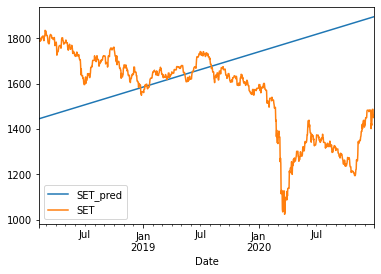

In [46]:
df = combine[['SET_pred','SET']]
df.index = combine['Date']
df.plot()

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math
#Forecast bias
forecast_errors = [combine['SET'][i]- combine['SET_pred'][i] for i in range(len(combine['SET']))]
bias = sum(forecast_errors) * 1.0/len(combine['SET'])
print('Bias: %f' % bias)
print('Mean absolute error:', mean_absolute_error(combine['SET'].values, combine['SET_pred'].values))
print('Mean squared error:', mean_squared_error(combine['SET'].values, combine['SET_pred'].values))
print('Root mean squared error:', math.sqrt(mean_squared_error(combine['SET'].values, combine['SET_pred'].values)))


Bias: -110.847902
Mean absolute error: 243.5854820415879
Mean squared error: 100606.61071852551
Root mean squared error: 317.18545161864773


In [48]:
lag_order = res_ASEAN.k_ar
# forecast 8 periods foreward
res_ASEAN.forecast(X_transform_ASEAN.values[-lag_order:],8)

array([[-8.25905450e-01, -2.22381381e+00, -8.67043845e+00,
        -7.80983773e-01, -2.63648185e+00, -1.51251957e+01],
       [ 6.32287515e-01, -2.20746348e+00,  7.53731200e+00,
        -3.74517320e-02,  1.23516946e+01, -1.56731678e+01],
       [ 8.07328225e-01,  4.54349579e-01, -2.48001323e+00,
        -8.34641775e-01, -1.73694327e+01, -1.54826534e+00],
       [ 2.67776060e-01,  2.29891374e-01, -4.93729773e-02,
         3.63431765e-01,  2.32213117e+00,  3.45749144e+00],
       [-1.02050410e-02,  4.20359568e-02, -1.34817207e-01,
         2.38813580e-01,  2.28762972e+00,  3.71315077e+00],
       [ 4.55073159e-01,  1.64292281e-01,  5.01400834e-01,
         1.40059400e-01,  3.22057830e+00,  1.26422669e-01],
       [ 5.03182412e-01,  1.89013940e-01,  2.00070893e-01,
         2.50853218e-01,  1.51259369e+00,  2.57835441e+00],
       [ 4.54596947e-01,  2.14965944e-01,  1.68132680e-01,
         2.47850511e-01,  1.46003694e+00,  2.49968990e+00]])

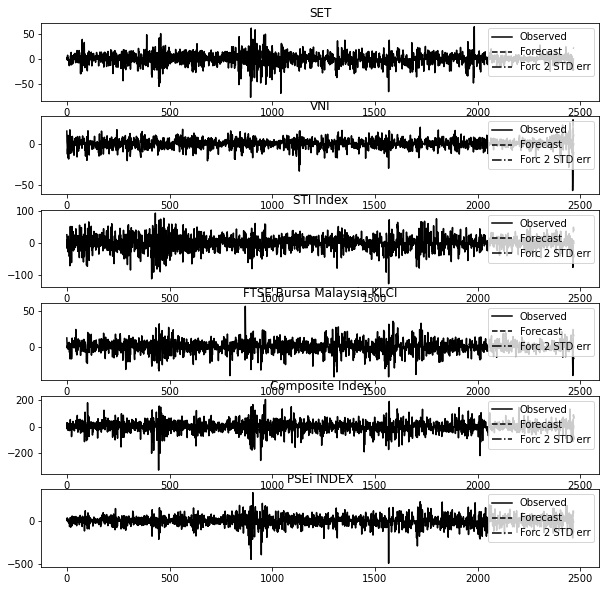

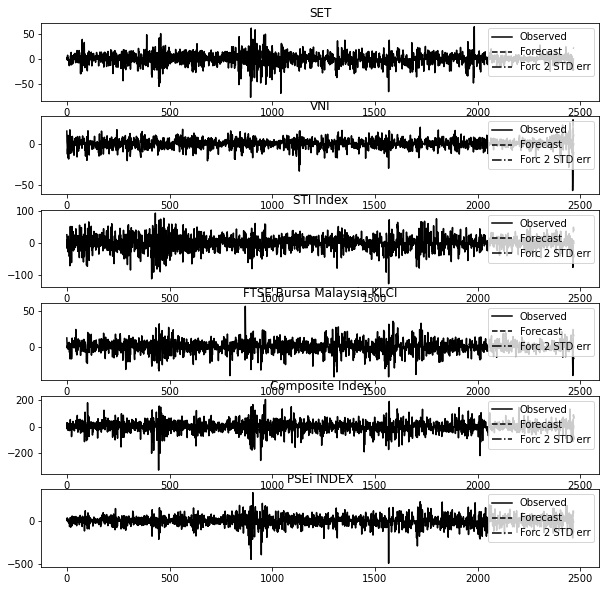

In [49]:
res_ASEAN.plot_forecast(5)

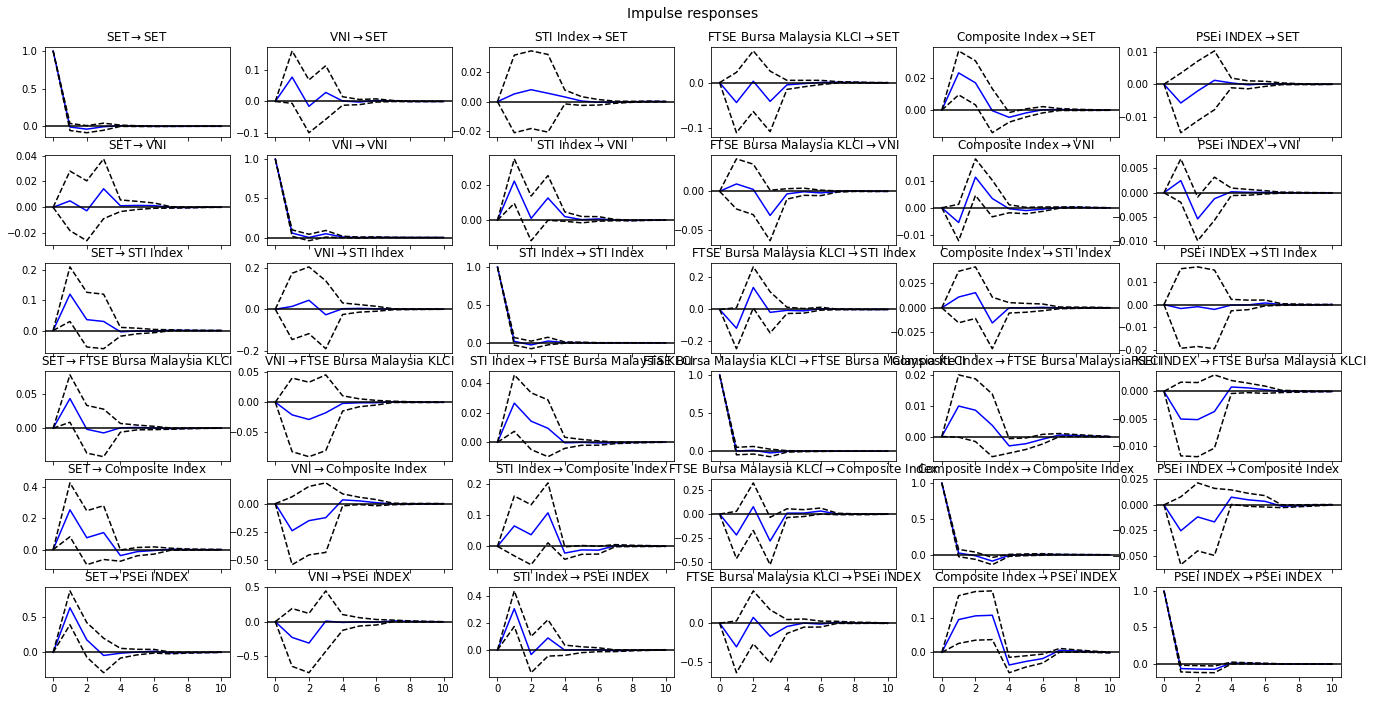

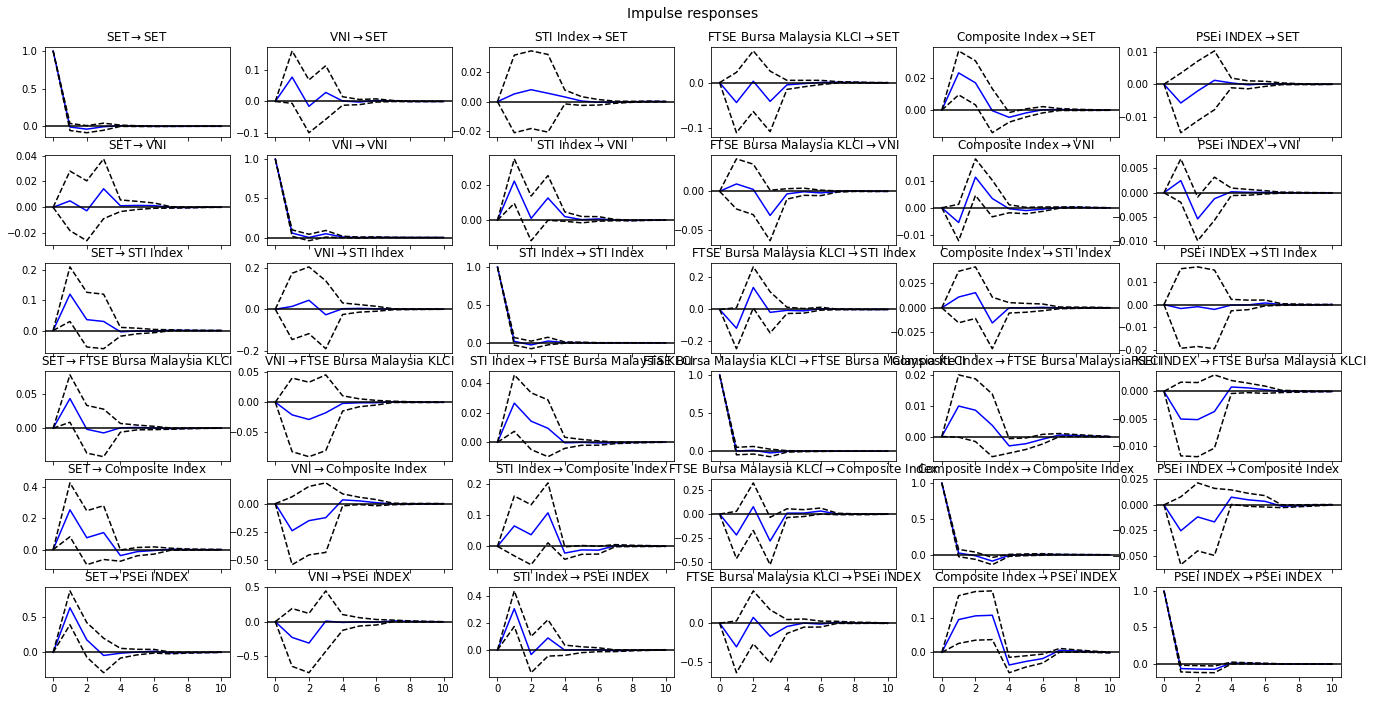

In [50]:
#Impulse Response Function
irf = res_ASEAN.irf(10)
irf.plot(orth=False,figsize = (20,10))

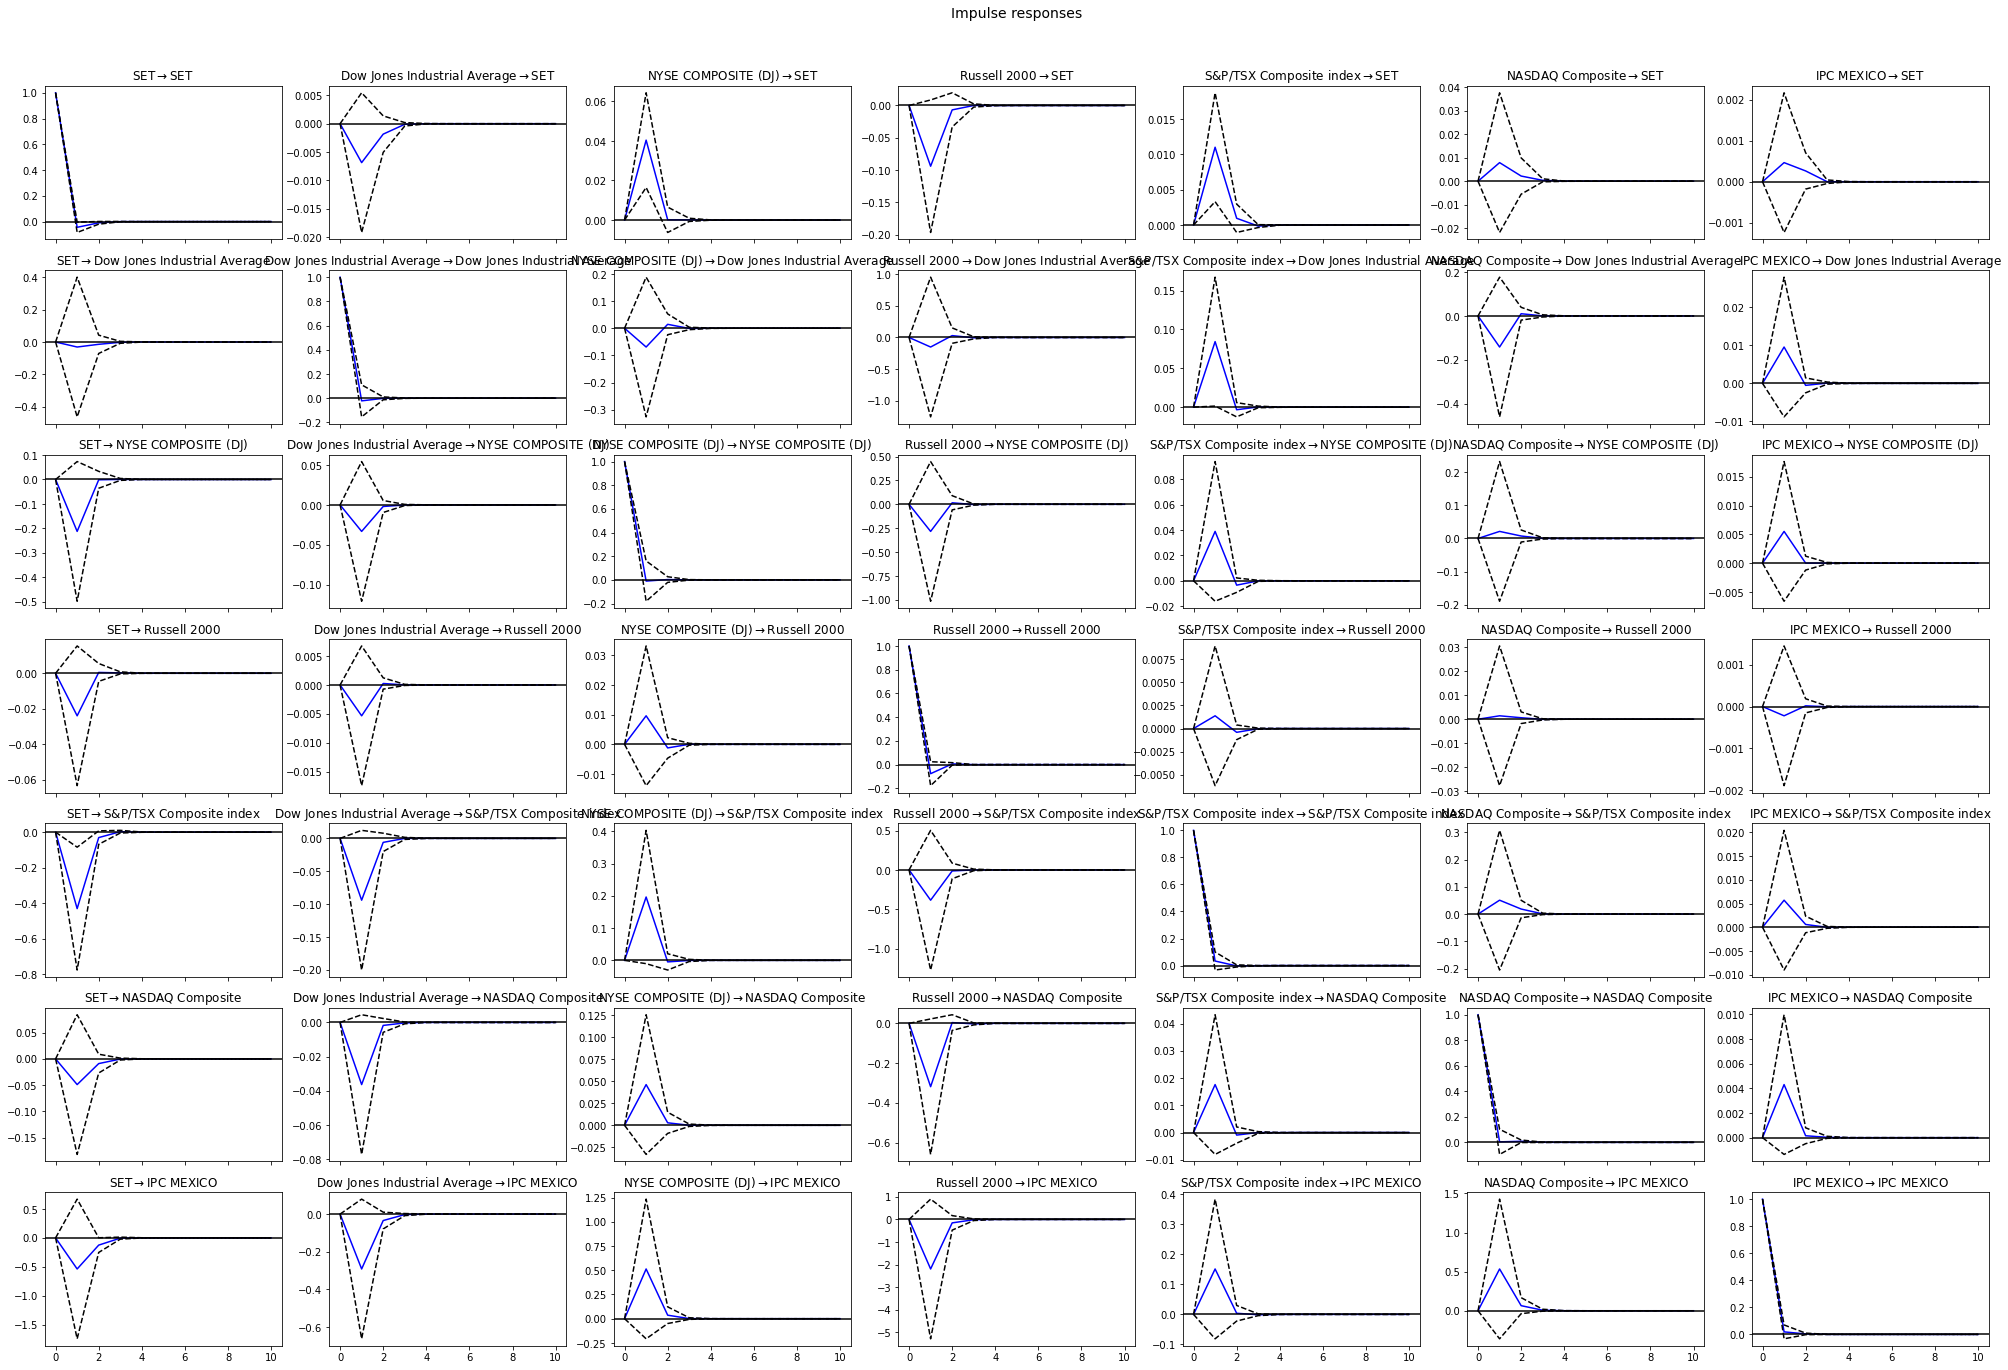

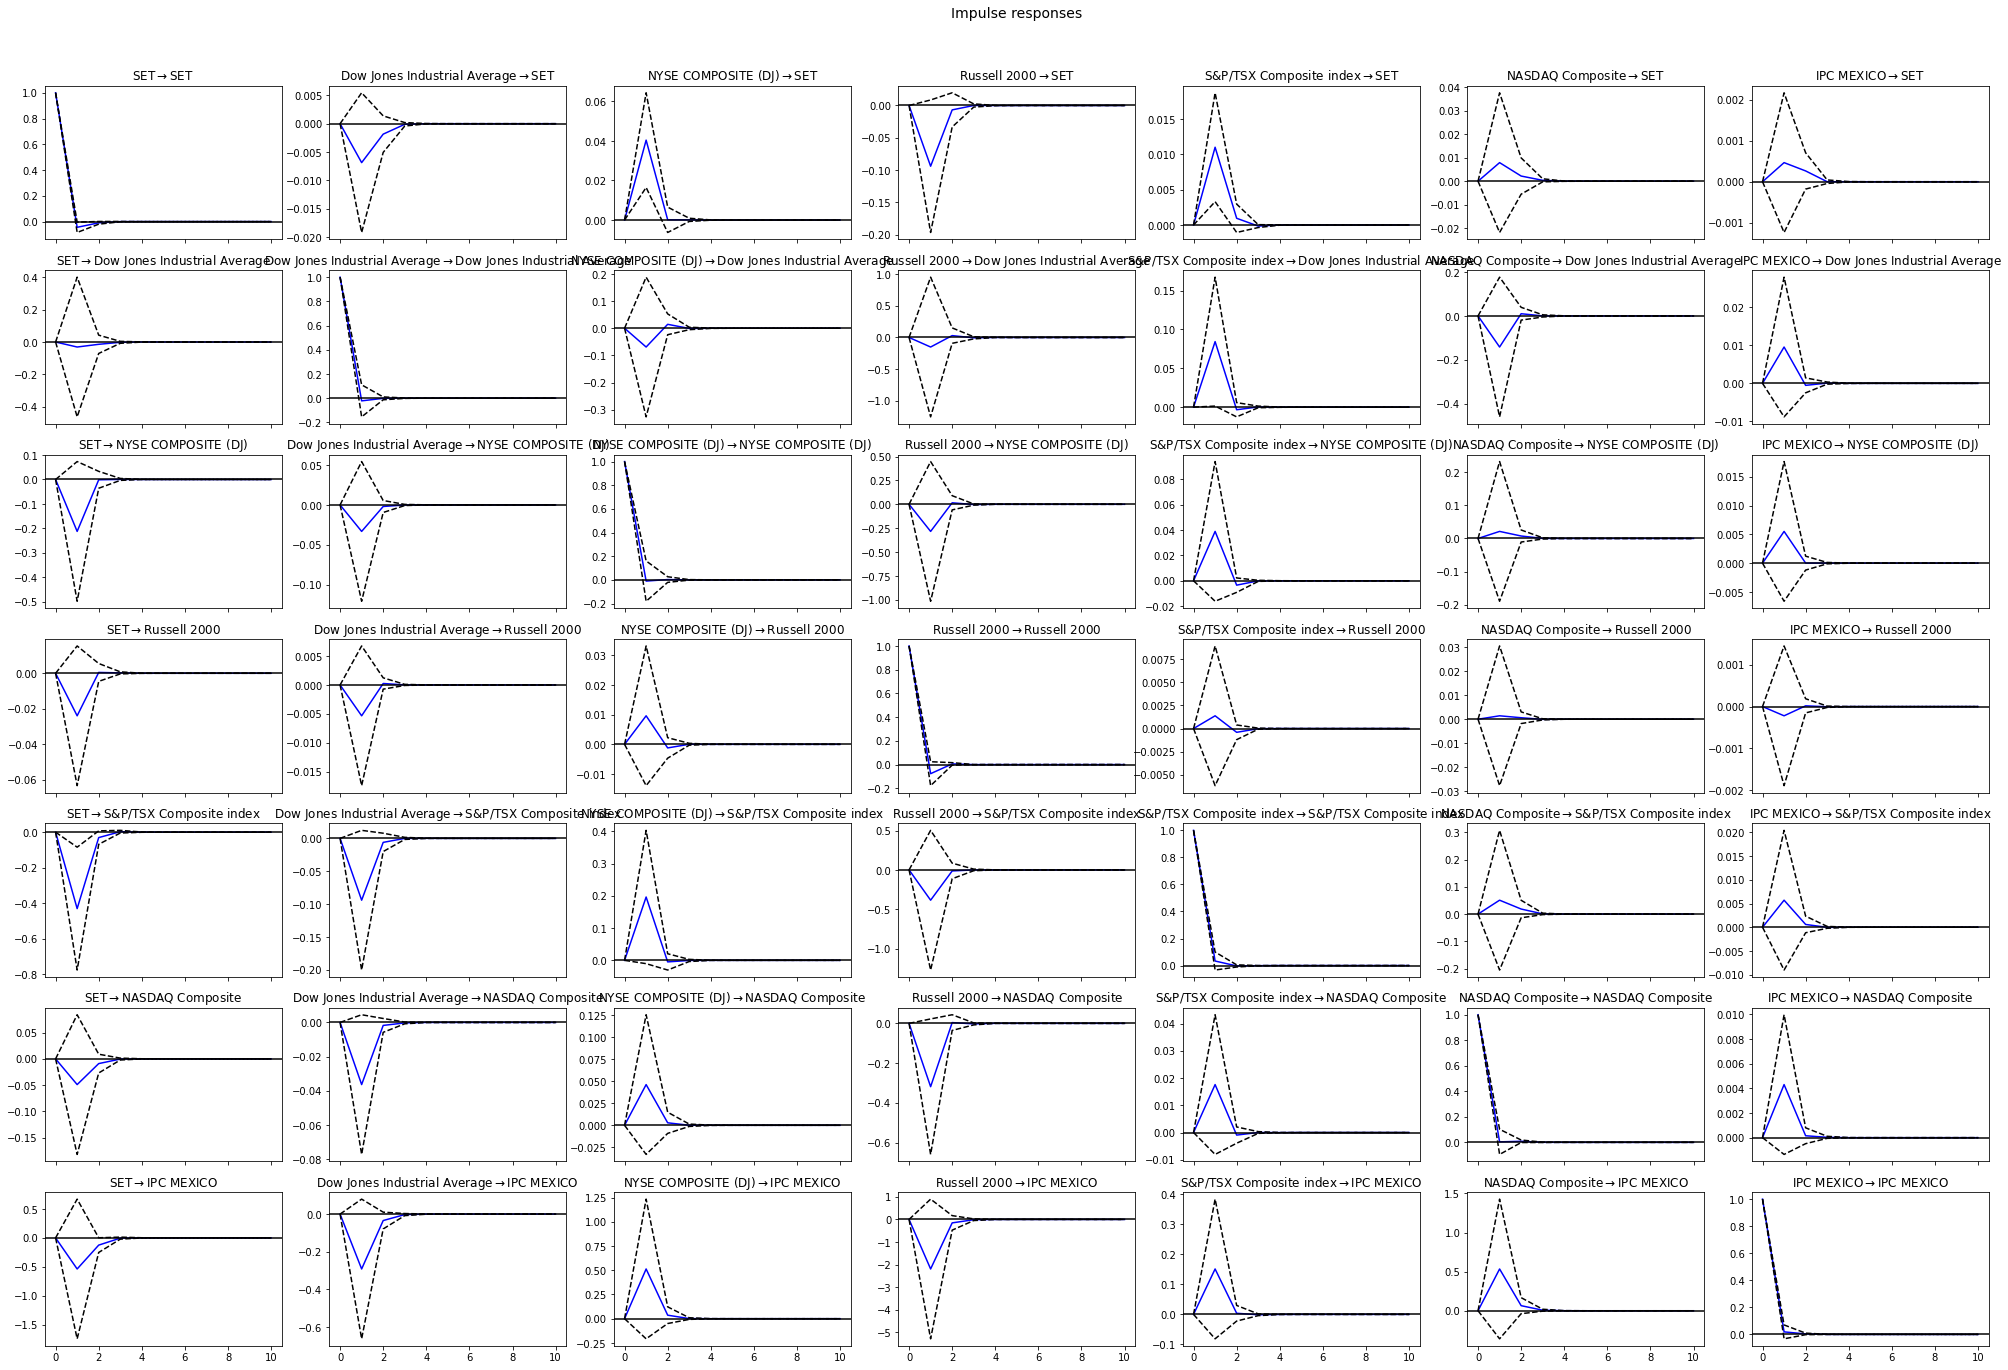

In [51]:
irf = res_NA.irf(10)
irf.plot(orth=False,figsize = (30,20))

# Some visualizations

In [2]:
# !pip install pandas-datareader
# !pip install yfinance
# !pip install matplotlib
# !pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import datetime

df = pd.read_csv('StocksData.csv')
df.info()
df.describe()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             3525 non-null   object 
 1   SET                              3525 non-null   float64
 2   VNI                              3525 non-null   float64
 3   STI Index                        3525 non-null   float64
 4   FTSE Bursa Malaysia KLCI         3525 non-null   float64
 5   Composite Index                  3525 non-null   float64
 6   PSEi INDEX                       3525 non-null   float64
 7   HANG SENG INDEX                  3525 non-null   float64
 8   Shenzhen Component               3525 non-null   float64
 9   KOSPI Composite Index            3525 non-null   float64
 10  Nikkei 225                       3525 non-null   float64
 11  ALL ORDINARIES                   3525 non-null   float64
 12  S&P/NZX 50 INDEX GRO

Date     SET     VNI    STI Index  FTSE Bursa Malaysia KLCI  \
0   2010-01-04  732.28  517.05  2894.550049               1275.750000   
1   2010-01-05  732.11  532.53  2920.280029               1288.239990   
2   2010-01-06  735.73  534.46  2930.489990               1293.170044   
3   2010-01-07  734.63  533.34  2913.250000               1291.420044   
4   2010-01-08  738.96  520.90  2922.760010               1292.979980   
..         ...     ...     ...          ...                       ...   
95  2010-05-17  753.26  511.27  2833.689941               1334.270020   
96  2010-05-18  760.11  508.30  2844.350098               1330.170044   
97  2010-05-19  765.54  494.90  2774.540039               1308.229980   
98  2010-05-20  765.54  503.55  2753.510010               1304.160034   
99  2010-05-21  765.54  483.69  2701.199951               1285.729980   

    Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
0       2575.312988  3004.237549     21823.279297        13533.387695   
1       2605.175537  3027.681396     22279.580078        13517.228516   
2       2603.195557  3039.148438     22416.669922        13505.028320   
3       2586.794189  3076.988770     22269.449219        13235.332031   
4       2614.268311  3076.388916     22296.750000        13267.291992   
..              ...          ...              ...                 ...   
95      2819.360107  3288.464355     19715.199219         9731.611328   
96      2834.075684  3264.230713     19944.939453        10003.698242   
97      2729.377686  3221.361572     19578.980469         9991.289062   
98      2694.144287  3212.973877     19545.830078         9945.438477   
99      2623.118896  3178.542725     19545.830078        10208.956055   

    KOSPI Composite Index  ...  MOEX Russia Index  IBOVESPA    IPC MEXICO  \
0             1696.140015  ...                NaN   70045.0  32758.529297   
1             1690.619995  ...                NaN   70240.0  32732.759766   
2             1705.319946  ...                NaN   70729.0  32830.160156   
3             1683.449951  ...                NaN   70451.0  33064.570312   
4             1695.260010  ...                NaN   70263.0  32892.039062   
..                    ...  ...                ...       ...           ...   
95            1651.510010  ...                NaN   62866.0  31580.630859   
96            1643.239990  ...                NaN   60841.0  31136.349609   
97            1630.079956  ...                NaN   59689.0  30992.759766   
98            1600.180054  ...                NaN   58192.0  30368.080078   
99            1600.180054  ...                NaN   60259.0  30629.150391   

    S&P/CLX IPSA       MERVAL       TA-125  Top 40 USD Net TRI Index  \
0    3620.699951  2384.489990  1089.339966                       NaN   
1    3624.100098  2401.750000  1098.199951                       NaN   
2    3639.959961  2362.459961  1098.310059                       NaN   
3    3681.060059  2389.449951  1094.040039                       NaN   
4    3726.500000  2352.760010  1094.040039                       NaN   
..           ...          ...          ...                       ...   
95   3855.379883  2185.919922  1053.430054                       NaN   
96   3855.209961  2183.229980  1053.430054                       NaN   
97   3849.750000  2178.399902  1053.430054                       NaN   
98   3781.219971  2089.580078  1022.570007                       NaN   
99   3781.219971  2123.620117  1022.570007                       NaN   

    Gold Jun 21  Crude Oil Jun 21  Bitcoin USD  
0   1117.699951         81.510002          NaN  
1   1118.099976         81.769997          NaN  
2   1135.900024         83.180000          NaN  
3   1133.099976         82.660004          NaN  
4   1138.199951         82.750000          NaN  
..          ...               ...          ...  
95  1227.699951         70.080002          NaN  
96  1214.300049         69.410004          NaN  
97  1192.599976         6

In [4]:
import pandas as pd
dti = pd.to_datetime(df['Date'])
df.index = dti
df.drop(['Date'],axis = 1,inplace = True)
df

SET      VNI    STI Index  FTSE Bursa Malaysia KLCI  \
Date                                                                  
2010-01-04   732.28   517.05  2894.550049               1275.750000   
2010-01-05   732.11   532.53  2920.280029               1288.239990   
2010-01-06   735.73   534.46  2930.489990               1293.170044   
2010-01-07   734.63   533.34  2913.250000               1291.420044   
2010-01-08   738.96   520.90  2922.760010               1292.979980   
...             ...      ...          ...                       ...   
2020-12-27  1486.31  1084.42  2833.399902               1641.170044   
2020-12-28  1452.67  1091.33  2840.139893               1643.900024   
2020-12-29  1461.95  1099.49  2848.139893               1634.989990   
2020-12-30  1449.35  1097.54  2869.219971               1644.410034   
2020-12-31  1449.35  1103.87  2869.219971               1644.410034   

            Composite Index   PSEi INDEX  HANG SENG INDEX  Shenzhen Component  \
Date                                                                            
2010-01-04      2575.312988  3004.237549     21823.279297        13533.387695   
2010-01-05      2605.175537  3027.681396     22279.580078        13517.228516   
2010-01-06      2603.195557  3039.148438     22416.669922        13505.028320   
2010-01-07      2586.794189  3076.988770     22269.449219        13235.332031   
2010-01-08      2614.268311  3076.388916     22296.750000        13267.291992   
...                     ...          ...              ...                 ...   
2020-12-27      6008.708984  7204.379883     26386.560547        14017.059570   
2020-12-28      6093.554199  7122.250000     26314.630859        14044.099609   
2020-12-29      6036.173828  7139.709961     26568.490234        13970.209961   
2020-12-30      5979.073242  7139.709961     27147.109375        14201.570312   
2020-12-31      5979.073242  7139.709961     27147.109375        14201.570312   

            KOSPI Composite Index    Nikkei 225  ...  MOEX Russia Index  \
Date                                             ...                      
2010-01-04            1696.140015  10654.790039  ...                NaN   
2010-01-05            1690.619995  10681.830078  ...                NaN   
2010-01-06            1705.319946  10731.450195  ...                NaN   
2010-01-07            1683.449951  10681.660156  ...                NaN   
2010-01-08            1695.260010  10798.320312  ...                NaN   
...                           ...           ...  ...                ...   
2020-12-27            2806.860107  26656.609375  ...        3236.879883   
2020-12-28            2808.600098  26854.029297  ...        3258.949951   
2020-12-29            2820.510010  27568.150391  ...        3274.669922   
2020-12-30            2873.469971  27444.169922  ...        3289.020020   
2020-12-31            2873.469971  27444.169922  ...        3289.020020   

            IBOVESPA    IPC MEXICO  S&P/CLX IPSA        MERVAL       TA-125  \
Date                                                                          
2010-01-04   70045.0  32758.529297   3620.699951   2384.489990  1089.339966   
2010-01-05   70240.0  32732.759766   3624.100098   2401.750000  1098.199951   
2010-01-06   70729.0  32830.160156   3639.959961   2362.459961  1098.310059   
2010-01-07   70451.0  33064.570312   3681.060059   2389.449951  1094.040039   
2010-01-08   70263.0  32892.039062   3726.500000   2352.760010  1094.040039   
...              ...           ...           ...           ...          ...   
2020-12-27  117857.0  43372.199219   5058.879883  51618.980469  1528.869995   
2020-12-28  119051.0  43883.410156   5058.879883  50483.839844  1554.939941   
2020-12-29  119475.0  44693.988281   5058.879883  51320.140625  1546.790039   
2020-12-30  119306.0  44693.960938   5058.879883  51226.488281  1563.560059   
2020-12-31  119306.0  44693.960938   5058.879883  51226.488281  1563.560059   

            Top 40 USD Net TRI Ind

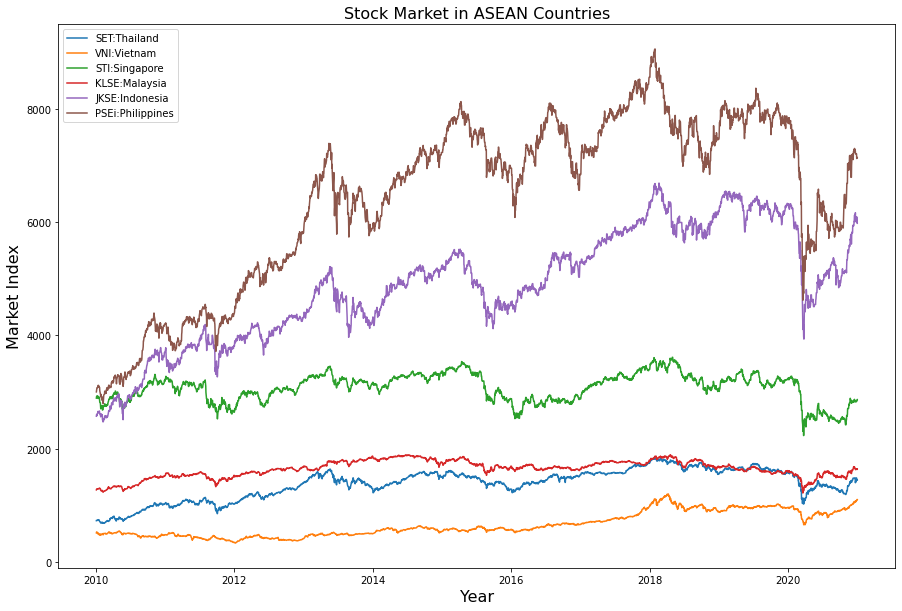

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['SET'], label='SET:Thailand')
ax.plot(df['VNI'], label='VNI:Vietnam')
ax.plot(df['STI Index'], label='STI:Singapore')
ax.plot(df['FTSE Bursa Malaysia KLCI'], label='KLSE:Malaysia')
ax.plot(df['Composite Index'], label='JKSE:Indonesia')
ax.plot(df['PSEi INDEX'], label='PSEi:Philippines')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Stock Market in ASEAN Countries', fontsize = 16);

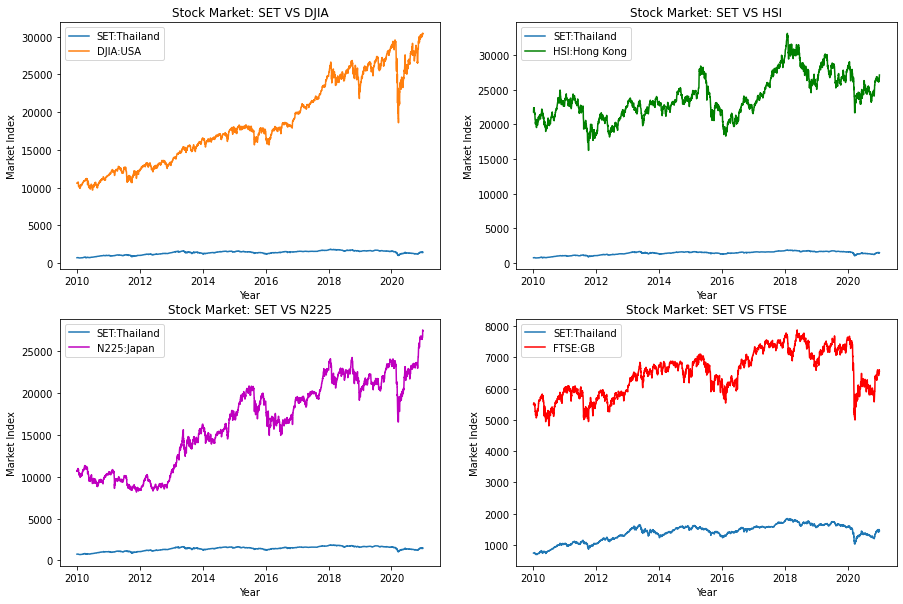

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv('StocksData(Closing Price).csv')
dti = pd.to_datetime(df['Date'])
df.index = dti
df.drop(['Date'],axis = 1,inplace = True)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))

#Plot
ax1.plot(df['SET'], label='SET:Thailand')
ax1.plot(df['Dow Jones Industrial Average'], label='DJIA:USA')
ax1.legend()
ax1.set_xlabel('Year')
ax1.set_ylabel('Market Index')
ax1.set_title('Stock Market: SET VS DJIA');

ax2.plot(df['SET'], label='SET:Thailand')
ax2.plot(df['HANG SENG INDEX'], label='HSI:Hong Kong', color='g')
ax2.legend()
ax2.set_xlabel('Year')
ax2.set_ylabel('Market Index')
ax2.set_title('Stock Market: SET VS HSI');

ax3.plot(df['SET'], label='SET:Thailand')
ax3.plot(df['Nikkei 225'], label='N225:Japan', color='m')
ax3.legend()
ax3.set_xlabel('Year')
ax3.set_ylabel('Market Index')
ax3.set_title('Stock Market: SET VS N225');

ax4.plot(df['SET'], label='SET:Thailand')
ax4.plot(df['FTSE 100'], label='FTSE:GB', color='r')
ax4.legend()
ax4.set_xlabel('Year')
ax4.set_ylabel('Market Index')
ax4.set_title('Stock Market: SET VS FTSE');

No handles with labels found to put in legend.


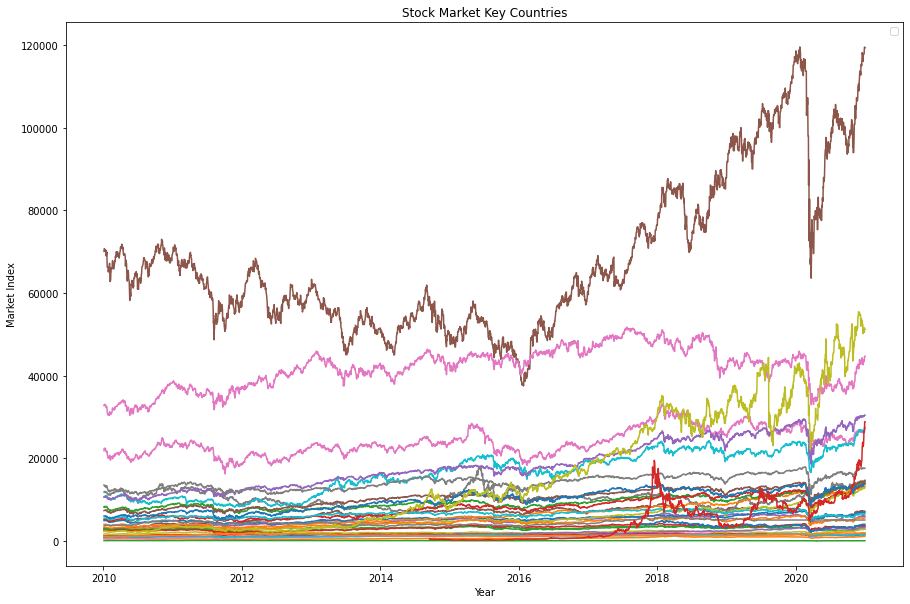

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df)

ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Market Index')
ax.set_title('Stock Market Key Countries');

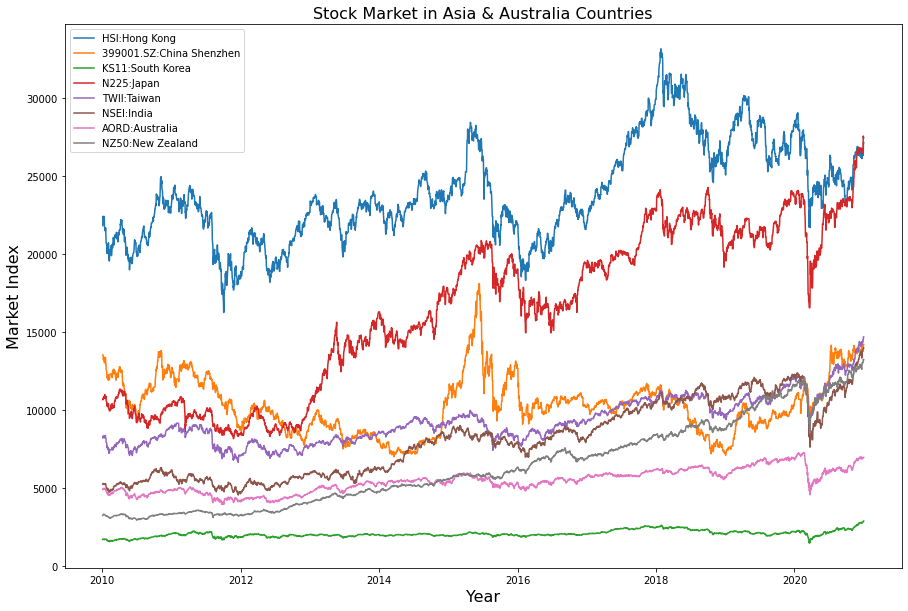

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['HANG SENG INDEX'], label='HSI:Hong Kong')
ax.plot(df['Shenzhen Component'], label='399001.SZ:China Shenzhen')
ax.plot(df['KOSPI Composite Index'], label='KS11:South Korea')
ax.plot(df['Nikkei 225'], label='N225:Japan')
ax.plot(df['TSEC weighted index'], label='TWII:Taiwan')
ax.plot(df['NIFTY 50'], label='NSEI:India')
ax.plot(df['ALL ORDINARIES'], label='AORD:Australia')
ax.plot(df['S&P/NZX 50 INDEX GROSS ( GROSS '], label='NZ50:New Zealand')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Stock Market in Asia & Australia Countries', fontsize = 16);

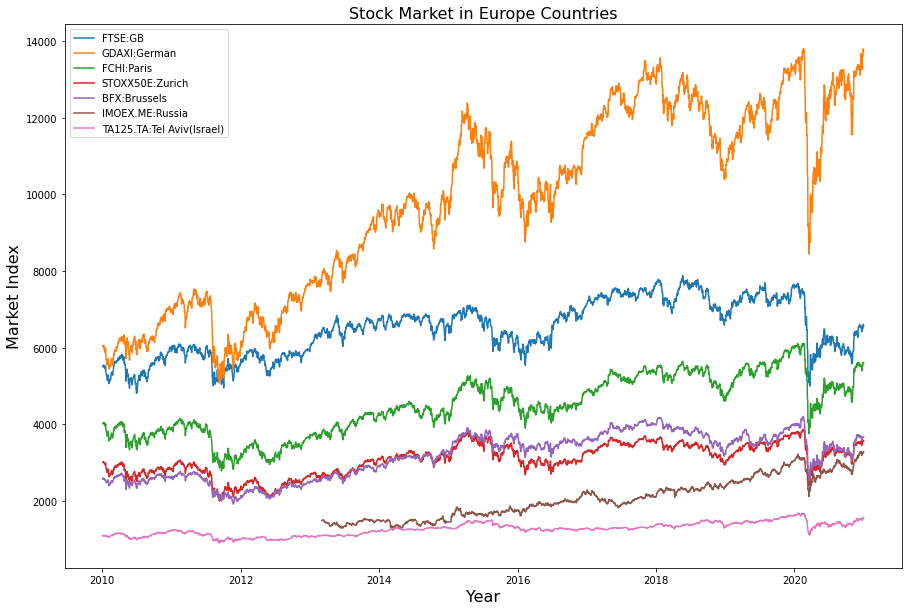

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['FTSE 100'], label='FTSE:GB')
ax.plot(df['DAX PERFORMANCE-INDEX'], label='GDAXI:German')
ax.plot(df['CAC 40'], label='FCHI:Paris')
ax.plot(df['ESTX 50 PR.EUR'], label='STOXX50E:Zurich')
ax.plot(df['BEL 20'], label='BFX:Brussels')
ax.plot(df['MOEX Russia Index'], label='IMOEX.ME:Russia')
ax.plot(df['TA-125'], label='TA125.TA:Tel Aviv(Israel)')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Stock Market in Europe Countries', fontsize = 16);

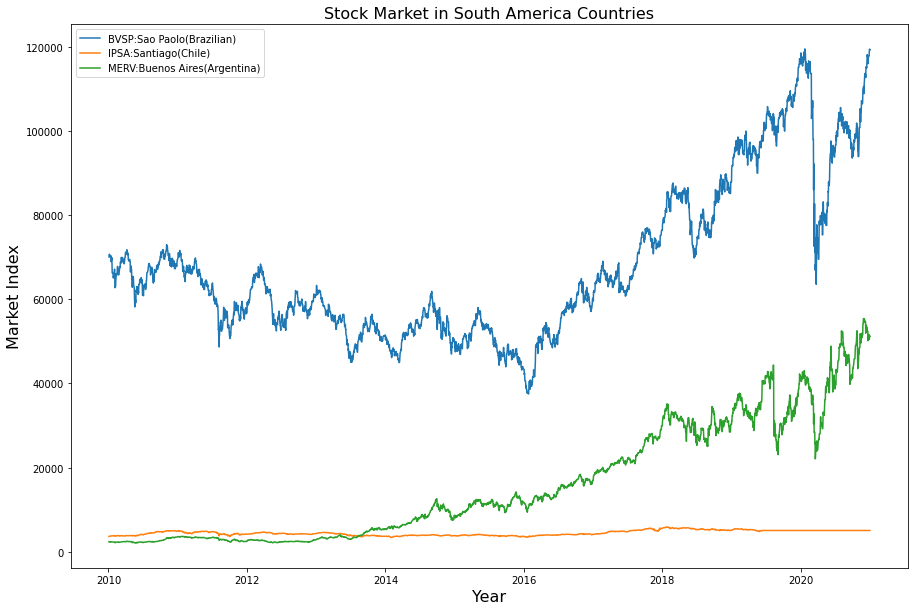

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['IBOVESPA'], label='BVSP:Sao Paolo(Brazilian)')
ax.plot(df['S&P/CLX IPSA'], label='IPSA:Santiago(Chile)')
ax.plot(df['MERVAL'], label='MERV:Buenos Aires(Argentina)')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Stock Market in South America Countries', fontsize = 16);

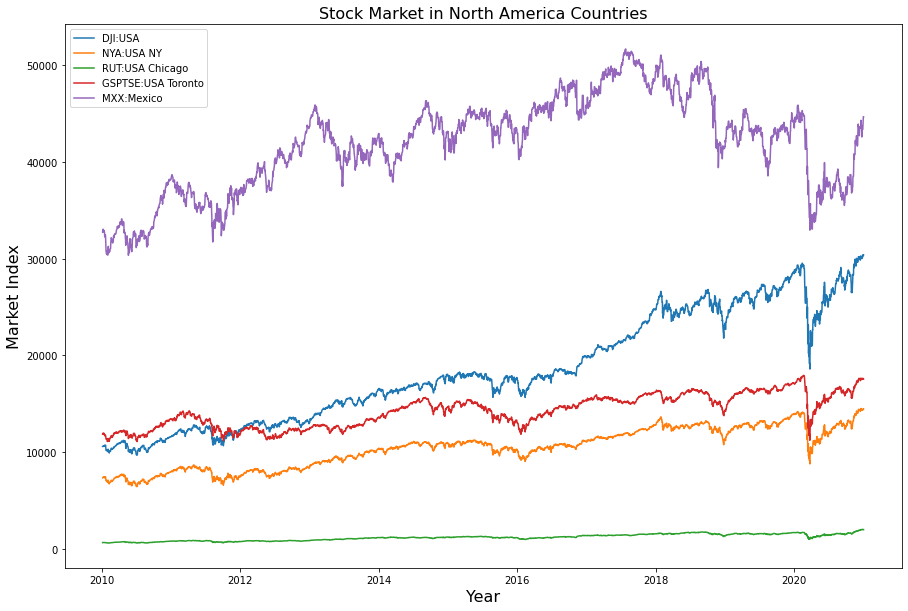

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['Dow Jones Industrial Average'], label='DJI:USA')
ax.plot(df['NYSE COMPOSITE (DJ)'], label='NYA:USA NY')
ax.plot(df['Russell 2000'], label='RUT:USA Chicago')
ax.plot(df['S&P/TSX Composite index'], label='GSPTSE:USA Toronto')
ax.plot(df['IPC MEXICO'], label='MXX:Mexico')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Stock Market in North America Countries', fontsize = 16);

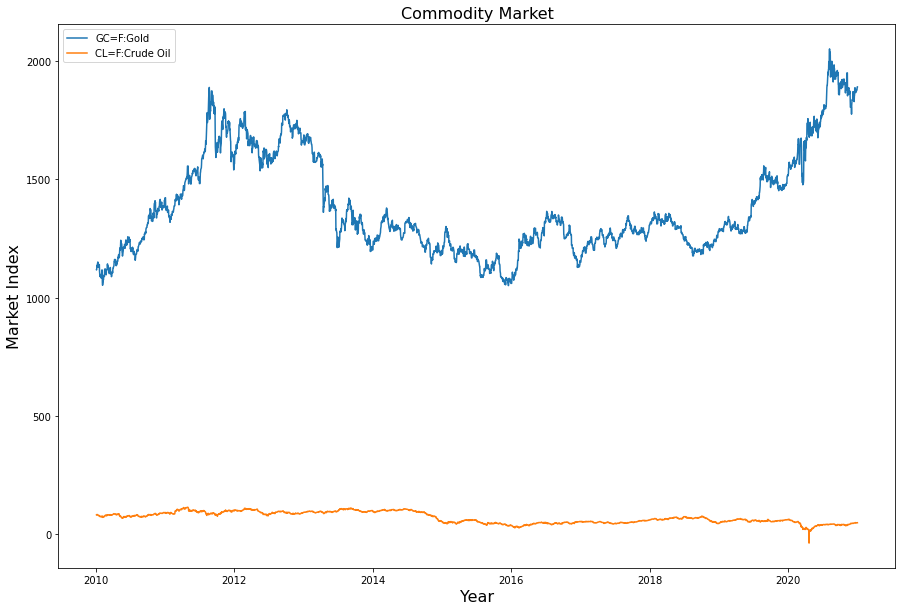

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df['Gold Jun 21'], label='GC=F:Gold')
ax.plot(df['Crude Oil May 21'], label='CL=F:Crude Oil')

ax.legend()
ax.set_xlabel('Year', fontsize = 16)
ax.set_ylabel('Market Index', fontsize = 16)
ax.set_title('Commodity Market', fontsize = 16);